**Introduction:**

This is a project predicting Attack for Network Intrusion Detection. The dataset used for this analysis was taken from Kaggle dataset. The raw network packets of the UNSW-NB15 is a comprehensive dataset for network intrusion detection systems which was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours. It was published in 2015. This dataset has nine types of attacks, namely: Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. It has features with the class label. I used a partition from this dataset configured as a training set called: UNSW_NB15_training-set.csv. The number of records in the dataset is 175,341 from different types of attacks and normal.

**- NOTE:**
 
The features of dataset are described in UNSW-NB15_features.csv file which says that:

  -In 'state' column: '-' means that 'Not used state'.

  -In 'service' column: '-' means that ' Not much used service'



**Objective:**

- Exploring  data for  analysing Network Intrusion Detection Attack.
- Perform anomaly detection using modelling tools and evaluate their learning profile to predict the anomaly detection.


**Questions:**

- Where Attacks are hapening more?
- What are the effect of Attak interms of rate, duration, etc.?
- what are the most frequent?

In [1]:
# Import Liberaries and Packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import struct
%matplotlib inline
from wordcloud import WordCloud
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.svm import SVC
from scipy.stats import mannwhitneyu
import dask.dataframe as dd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Load dataset:

df = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\capstonbotdataset\UNSW_NB15_training-set.csv')


In [3]:
# Look at the dataset:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
# look at the shape of dataset:
df.shape

(82332, 45)

In [5]:
# Clean dataset by dropping duplicates: 

df.drop_duplicates(inplace=True)

In [6]:
# Look at the length of dataset after removing duplicates:
len(df)

82332

In [7]:
# Look at the type of columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 45 columns):
id                   82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

In [8]:
# Find out percentage of missing values in each column:

null_count = round(df.isnull().sum()*100/df.isnull().count(),2)
null_count[null_count>0]

Series([], dtype: float64)

In [9]:
# Find out object columns:

object_columns = df.select_dtypes('object')
object_columns.head()

,proto,service,state,attack_cat
0,udp,-,INT,Normal
1,udp,-,INT,Normal
2,udp,-,INT,Normal
3,udp,-,INT,Normal
4,udp,-,INT,Normal


In [10]:
# Find out unique values in each object column:

for col in object_columns:
    print("Unique values in column {} are: {}, {}".format(col, df[col].nunique(), df[col].unique()))

Unique values in column proto are: 131, ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' '

In [11]:
# Replace the '-' to 'else' based on note in dataset:

df['service'] = df['service'].replace('-', 'else')

In [12]:
# Look at the unique value of service column:
df["service"].unique()

array(['else', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [13]:
# Descriptive statistics for object columns:
df.describe(include=['O'])

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,13,7,10
top,tcp,else,FIN,Normal
freq,43095,47153,39339,37000


In [14]:
# Get univariate statistics for numeric columns:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


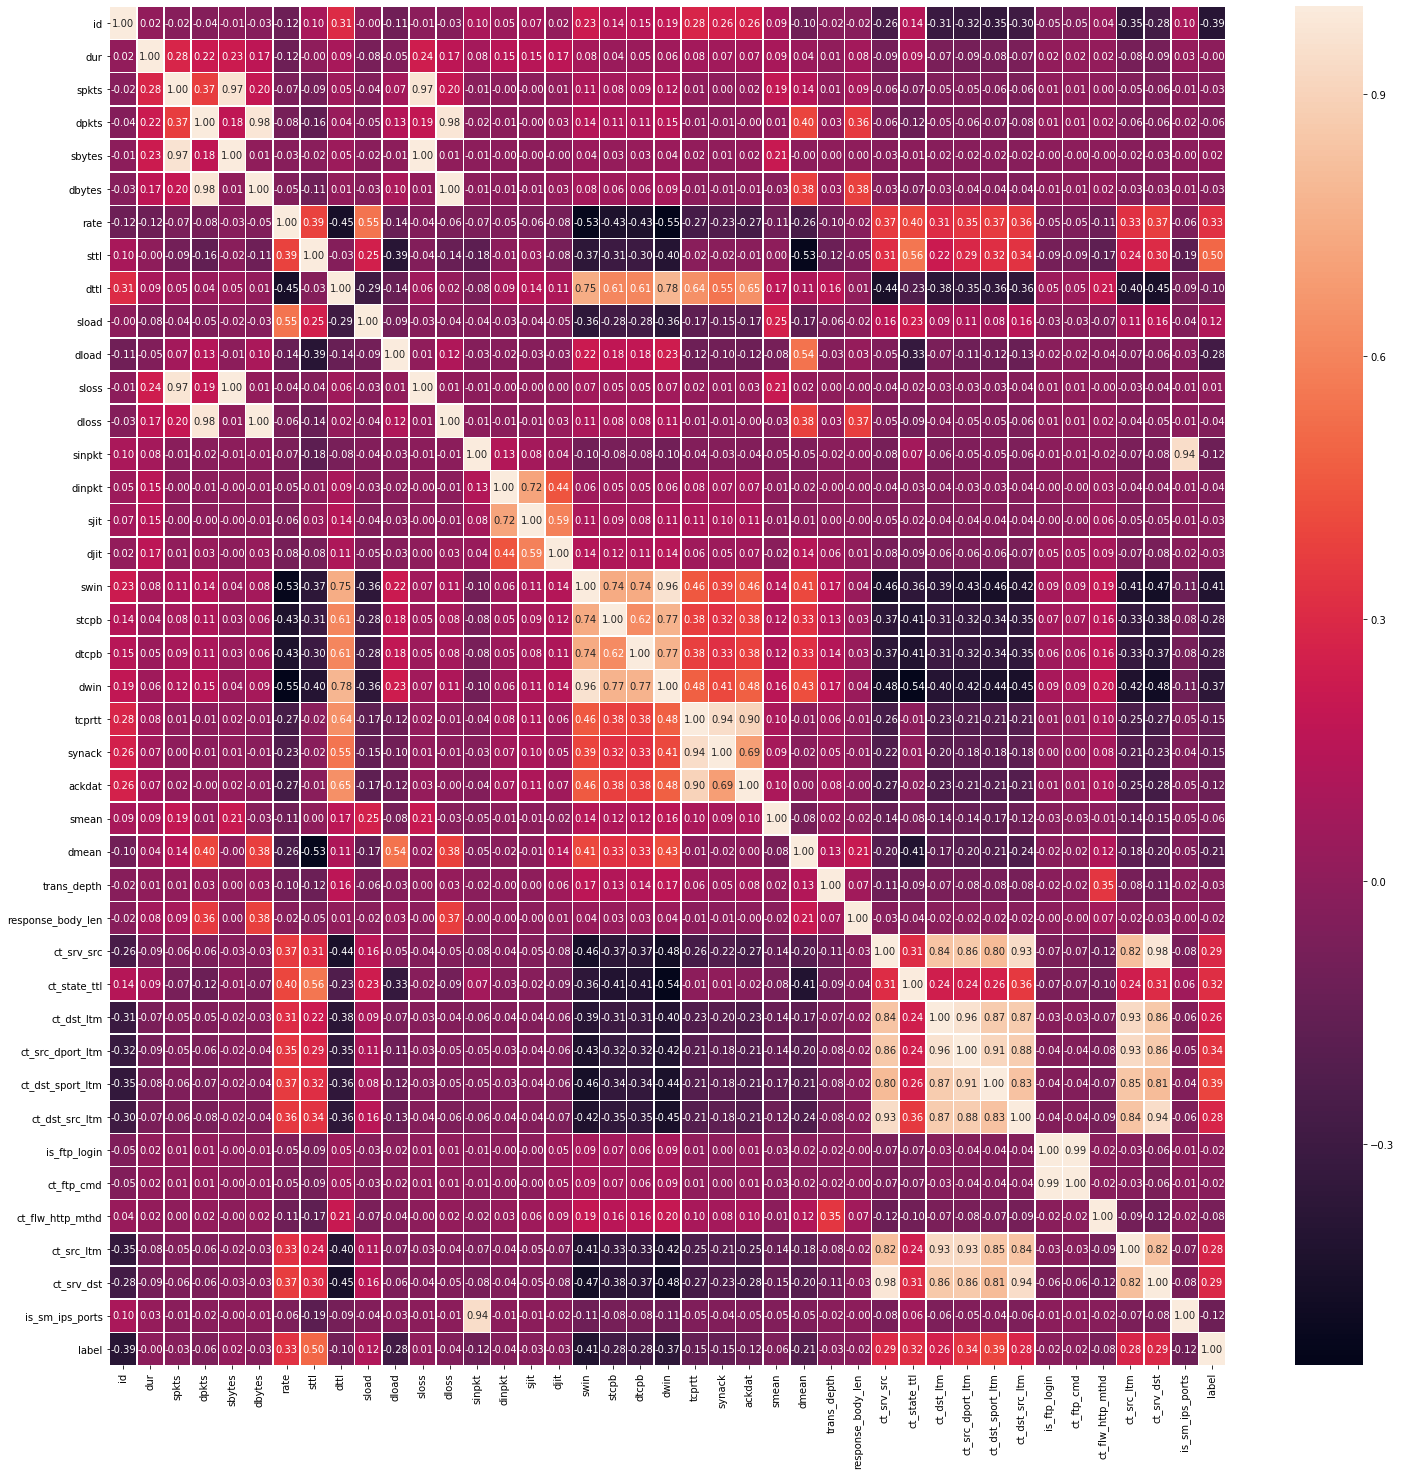

In [15]:
# look at the correlation between columns:

plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

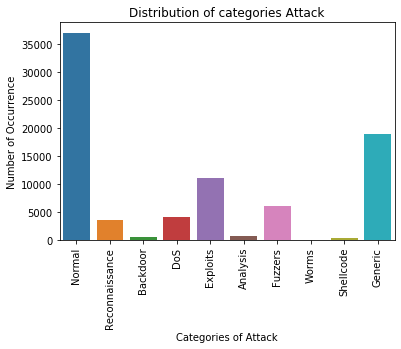

In [16]:
# Look at the distribution of target variable.

sns.countplot(df['attack_cat'])        
plt.title('Distribution of categories Attack')
plt.xlabel("Categories of Attack")
plt.ylabel("Number of Occurrence")
plt.xticks(rotation =90)
plt.show()

The number of Normal records is higher than Attack records.

In [17]:
# Findout numeric columns:

numeric_columns = df.select_dtypes(exclude=['object']).columns
print('Number of numeric columns is {}'.format(len(numeric_columns)))

Number of numeric columns is 41


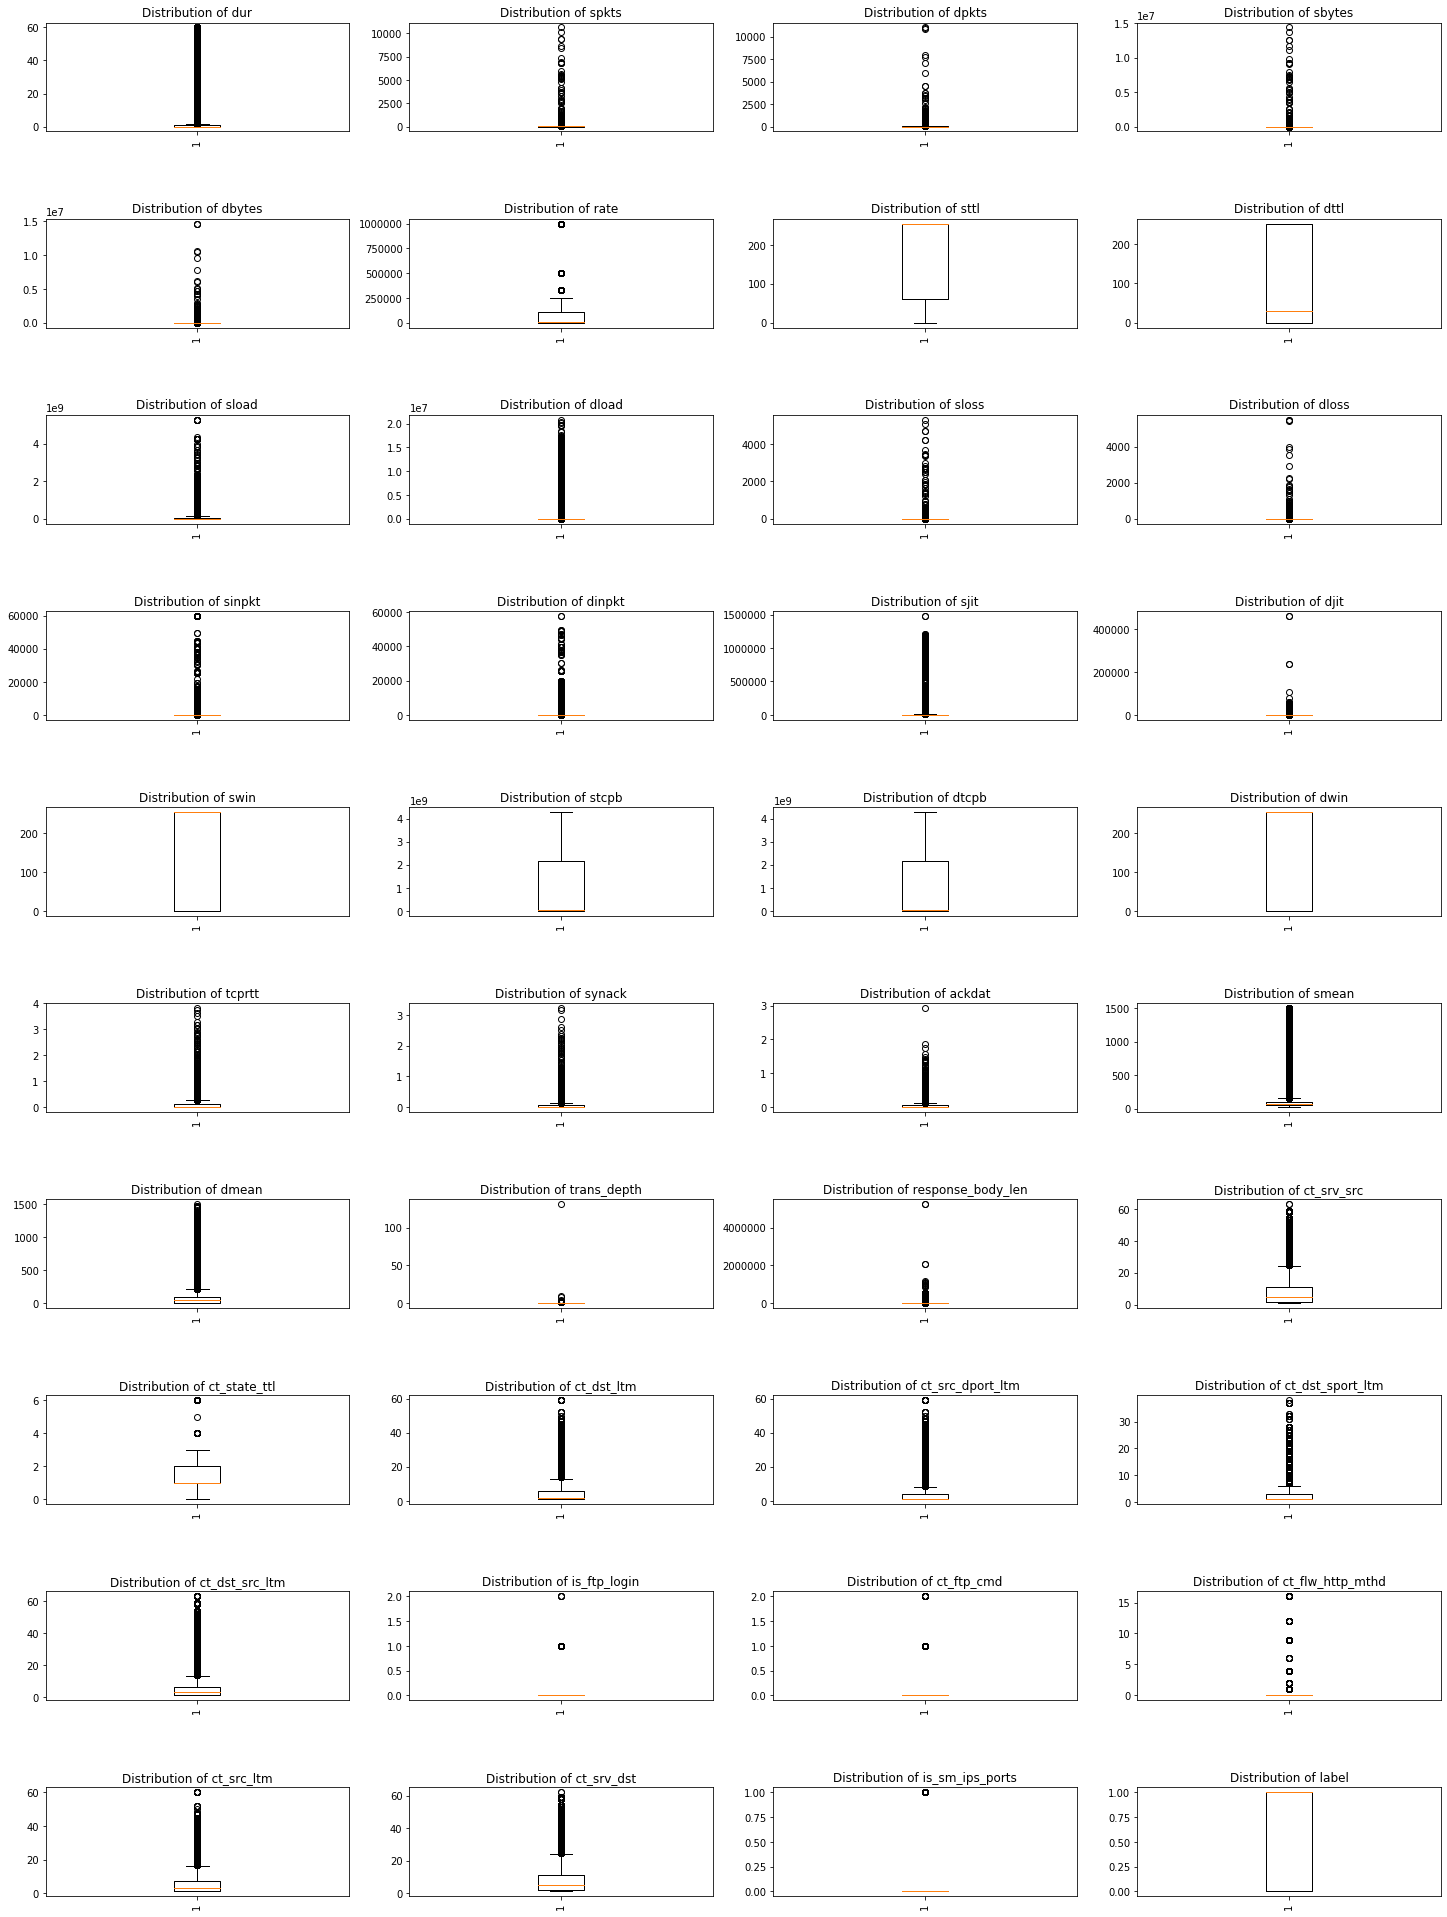

In [18]:
# Univariate visualization of continuous variables by using hist:

plt.figure(figsize=(25,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(11, 4, i+1)
    plt.boxplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As you can see, most of the columns have outlier in one side.

In [19]:
# Find out non_numeric columns:

nonnumeric_columns = df.select_dtypes(['object']).columns
print('Number of non_numeric columns is {}'.format(len(nonnumeric_columns)))

Number of non_numeric columns is 4


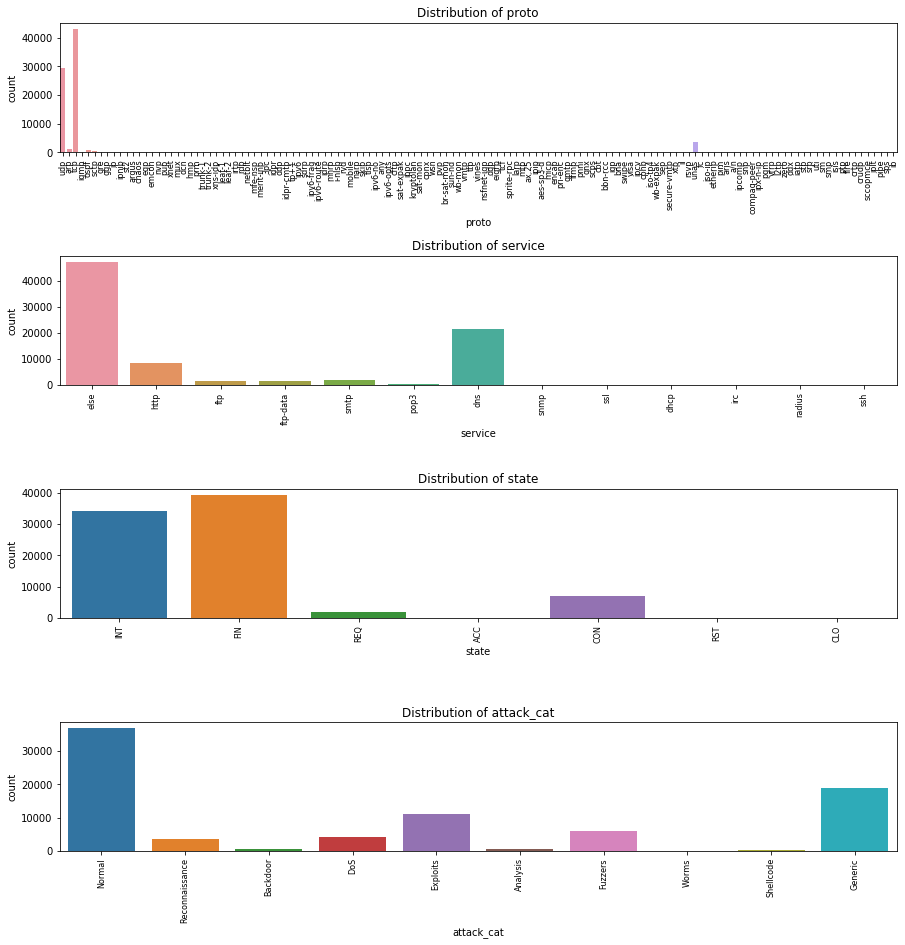

In [20]:
# Univariate visualization of categorical variables by bar plot:

plt.figure(figsize=(15,20))
for i,col in enumerate(nonnumeric_columns):
    plt.subplot(4, 1, i+1)
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

**Most Common Occurance:** 

- TCP and UDP are most common protocols used in the dataset, also TCP was used more than UDP. 

- DNS and other services are most common services used, also other services was used more than DNS.

- INT and FIN are most common states were used and FIN was used more.

- The number of Normal records is greater than Attack records. 

- The most common Attack occured in the dataset is Generic and then Exploits. 



In [21]:
# Keep top 6 protocols used:

df['proto'].value_counts()[:6].sum()/df.shape[0]*100
proto_other_lst = list(df['proto'].value_counts()[7:].index)
df['proto'] = df['proto'].apply(lambda x: x if x not in proto_other_lst else 'other')
df['proto'].value_counts()

tcp      43095
udp      29418
other     4221
unas      3515
arp        987
ospf       676
sctp       324
any         96
Name: proto, dtype: int64

In [22]:
# make copy of dataset:
df_main = df.copy()

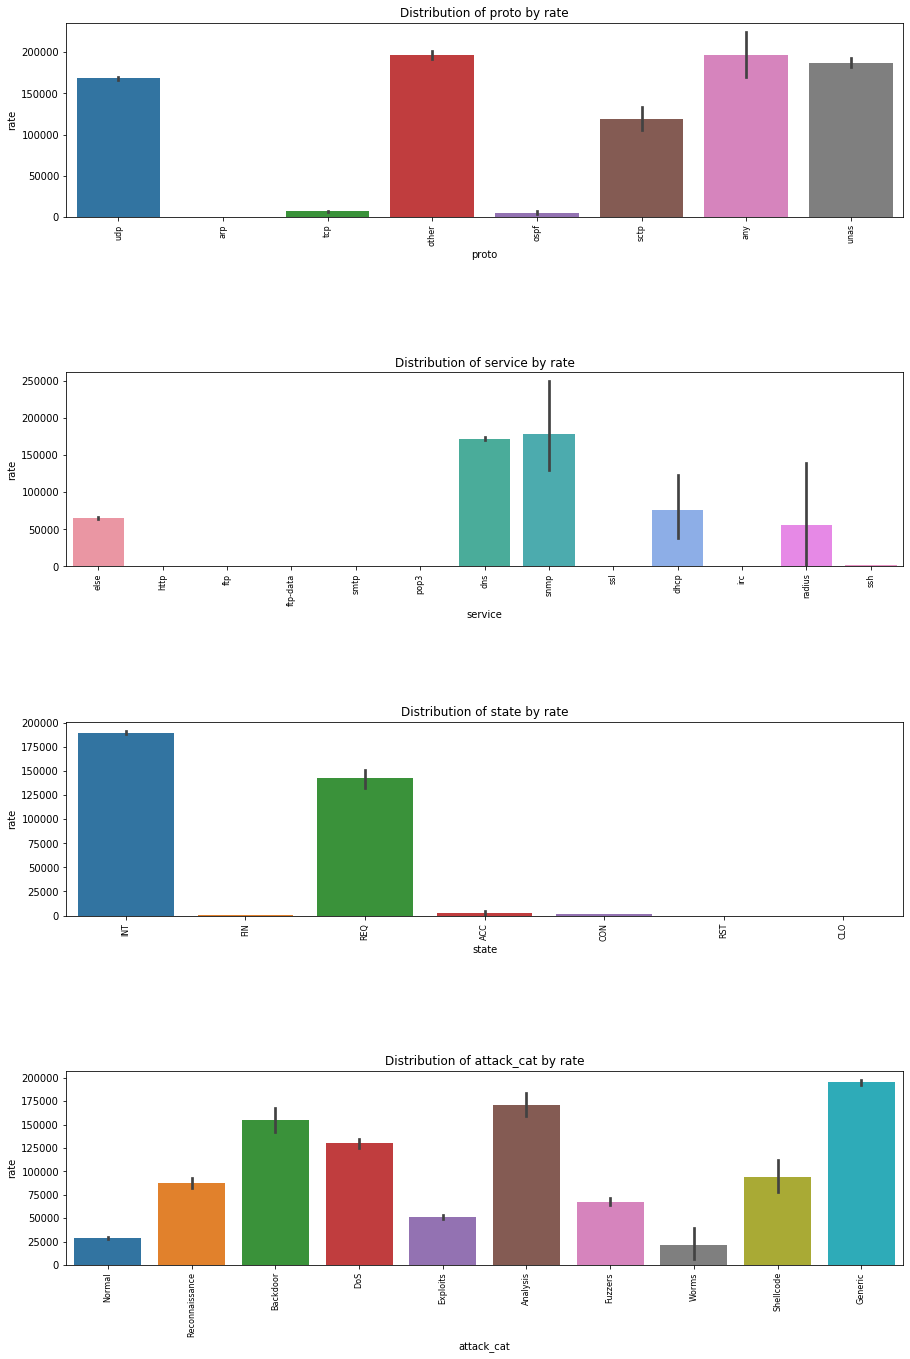

In [23]:
# Bivariate analysis of a continuous-categorical pair:

plt.figure(figsize=(15,30))
for i,col in enumerate(nonnumeric_columns):
    plt.subplot(4,1,i+1)
    sns.barplot(df[col], df['rate'])
    plt.title(f'Distribution of {col} by rate')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

- Minimum rate is for TCP protocol.
- Highest rate is for SNMP service.
- Highest rate is for INT transaction state
- Highest rate is for Generic Attack.

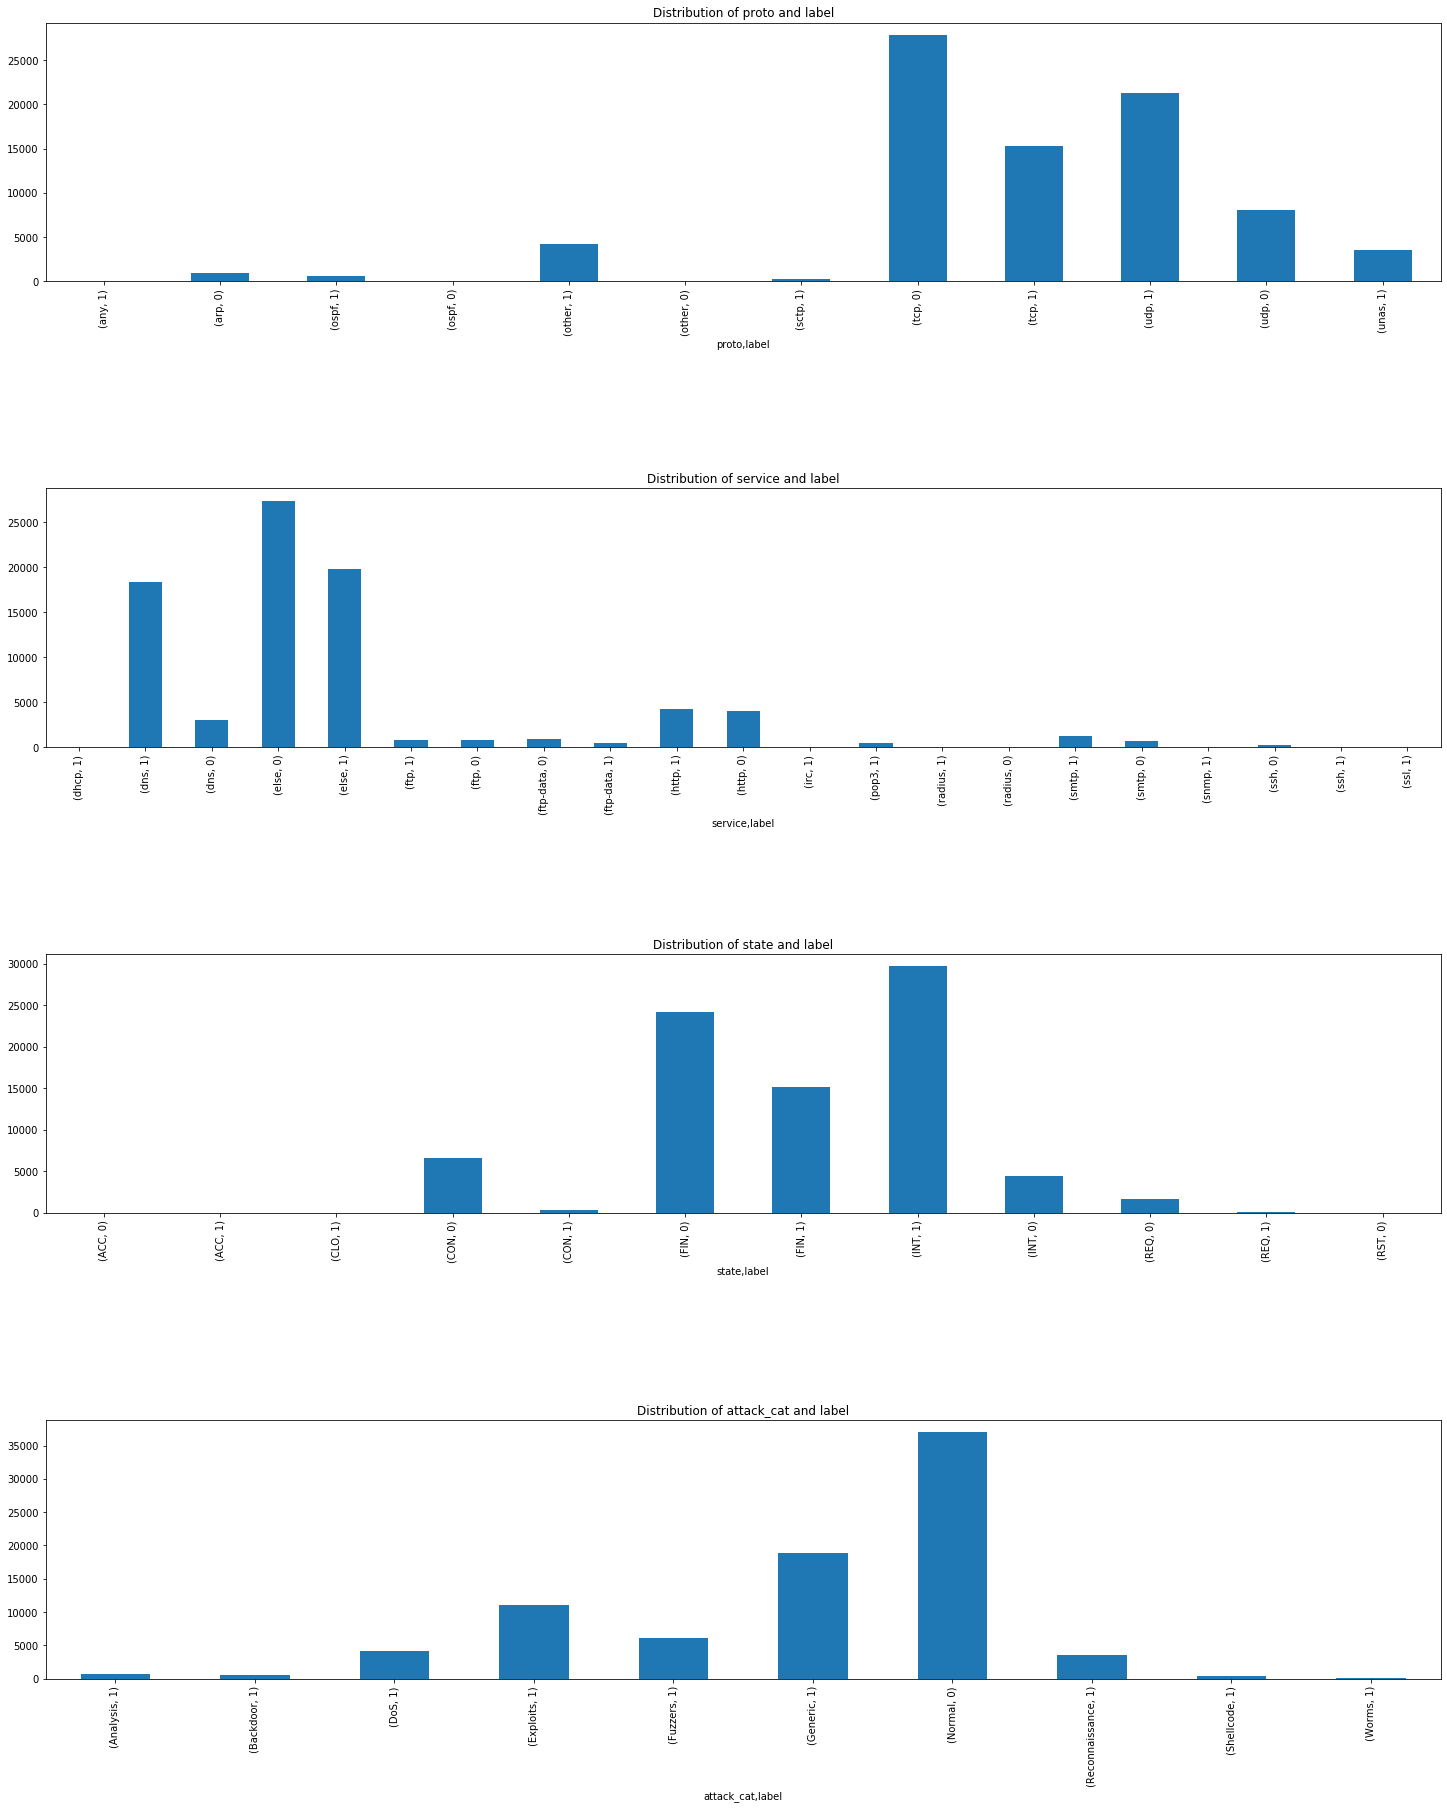

In [24]:
# Bivariate analysis of a continuous-categorical pair:

plt.figure(figsize=(25,40))
for i,col in enumerate(nonnumeric_columns):
    plt.subplot(4,1,i+1)
    df.groupby(col).label.value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col} and label')
    plt.xticks(rotation=90, fontsize=10)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()


- In TCP and UDP protocols, number of Normal records is greater than Attack records.
- Most common protocol for Attack is UDP.
- Most common service for Attack is DNS.
- Most common state for Attack is INT.
- The number of Normal records in other services is greater than Attack records. But in DNS the number of Attack records is greater than normal.
- The number of Attack records in INT state is greater then Normal. But in FIN the number of Normal records is greater than Attack records. 
- The number of Normal records is highr than Attack records.
- Most common Attack is for Generic then Explotis.

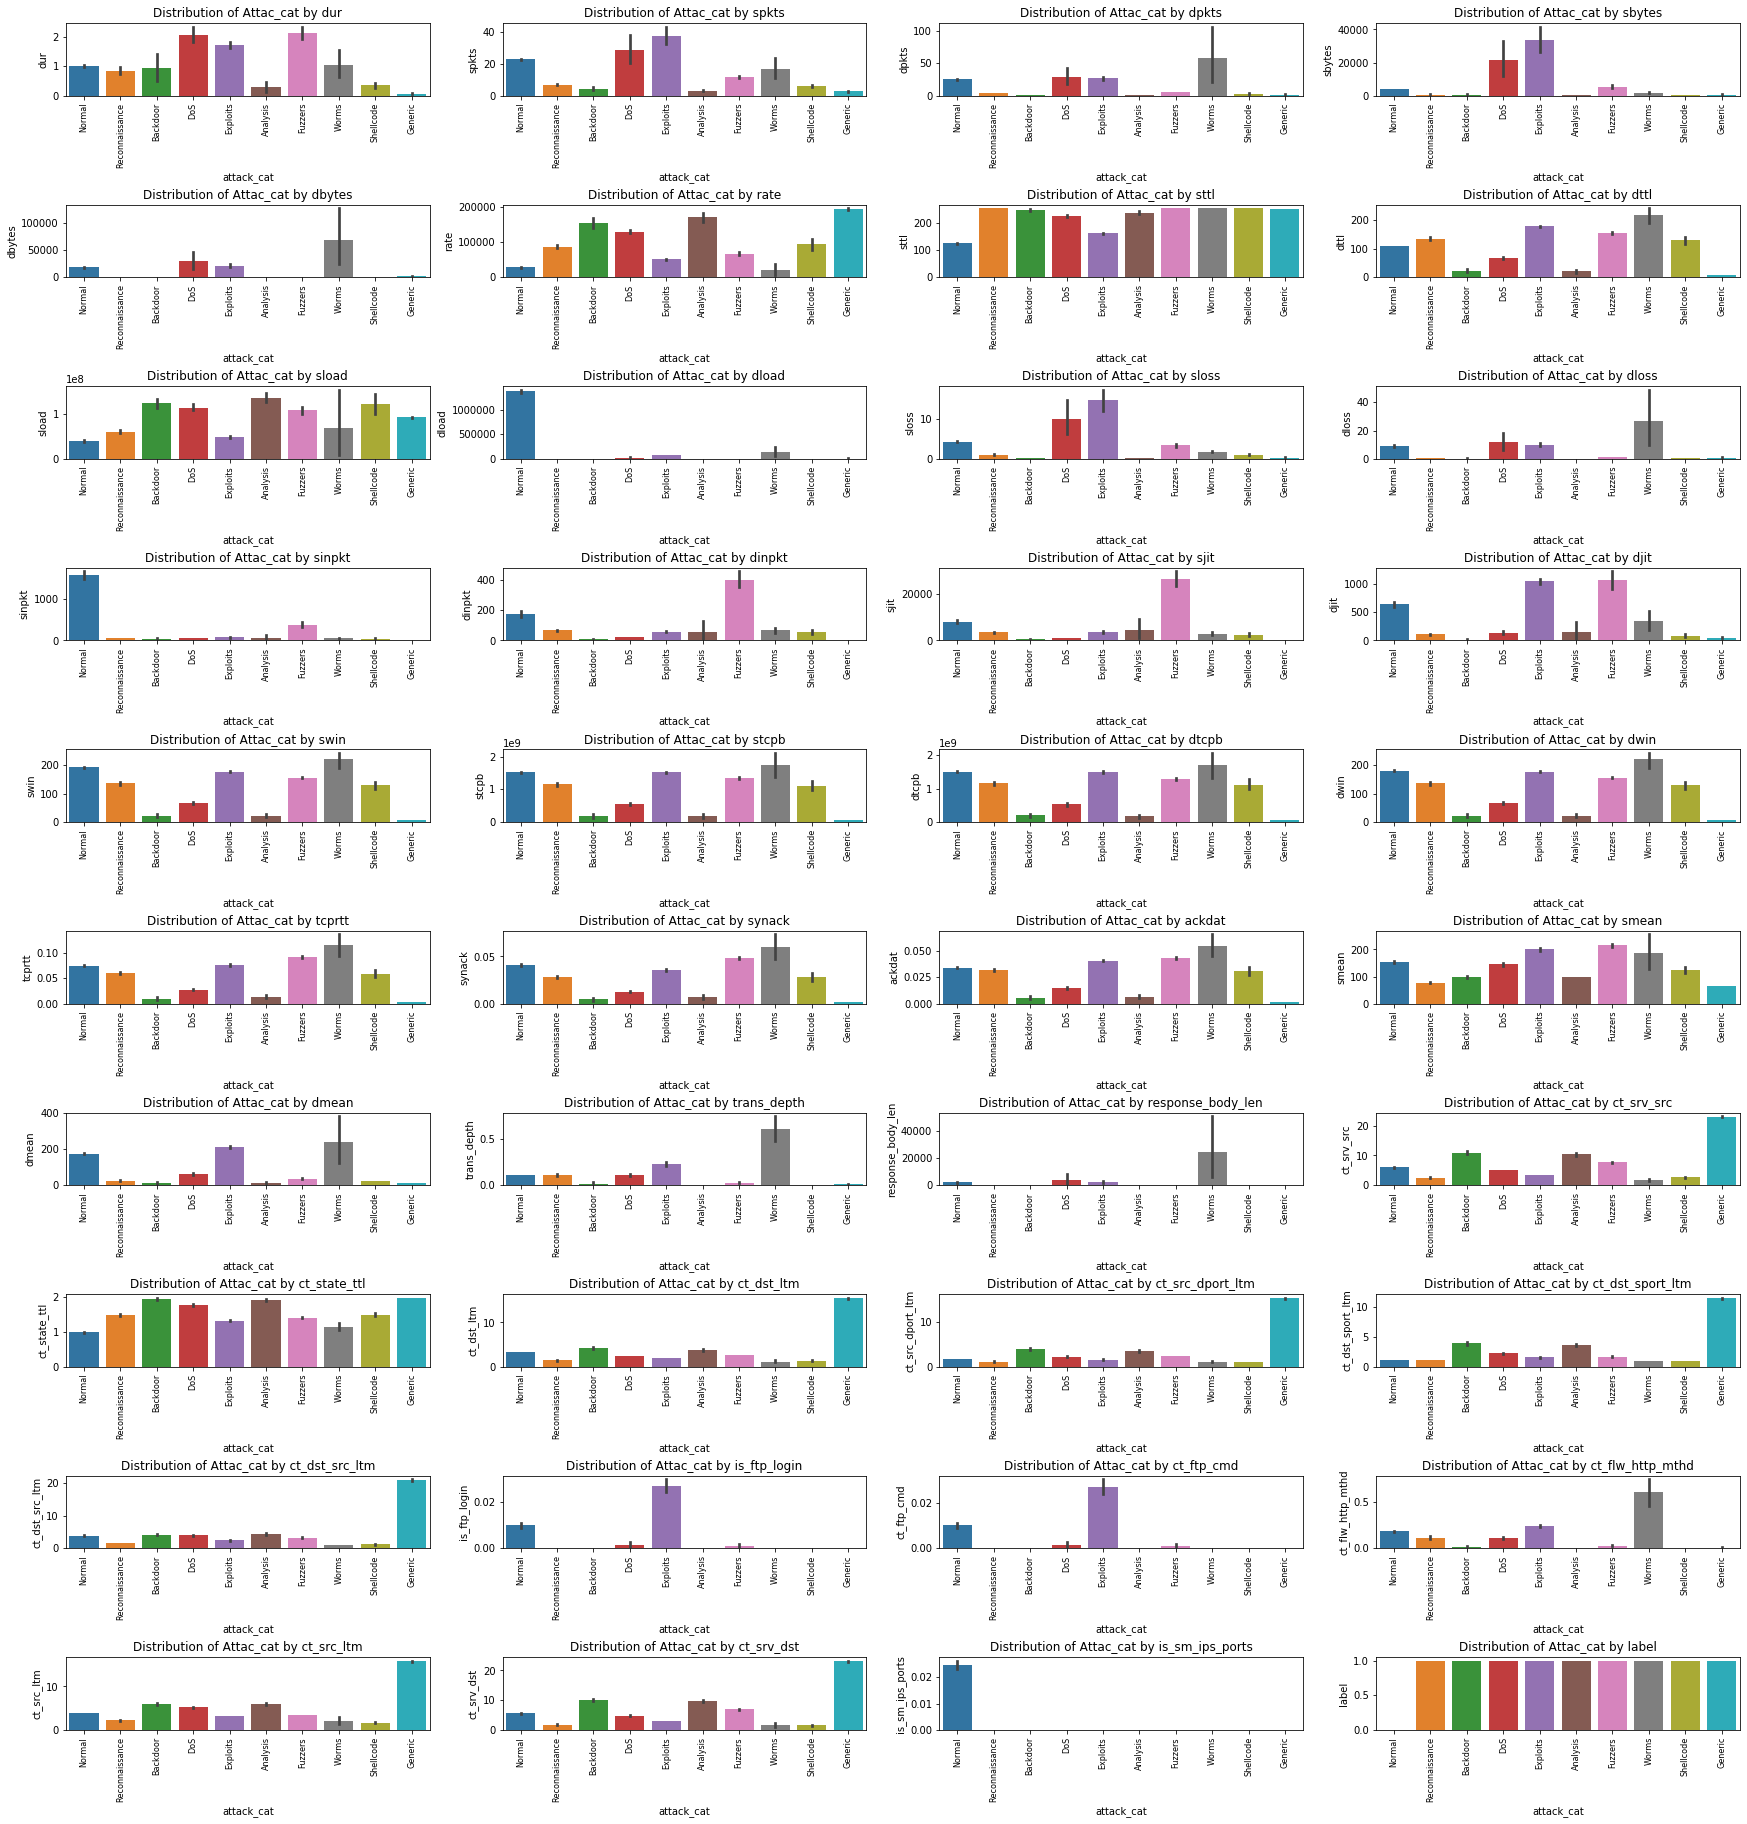

In [25]:
# Bivariate analysis of a continuous-categorical pair:

plt.figure(figsize=(30,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(12,4,i+1)
    sns.barplot(df['attack_cat'], df[col])
    plt.title(f'Distribution of Attac_cat by {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 1.5, top = 0.7)
plt.show()

**-Attack:**

- Dos and Fuzzers Attacks have most total duration of records.
- Exploits Attack has maximum number of packets (bytes) from source to destination.
- Worms Attack has maximum number of packets (bytes) from destination to sourc.
- Generic Attack has most total transaction packets per second.
- Normal records have lowest time to live value from Source to destination.
- Worms Aattack has longest time to live value from destination to source.
- Normal records have minimum source bits per second, but for destination have maximum.
- Exploits Attack has maximum number of source packets retransmitted or dropped. 
- Worms Attack has maximum number of destination packets retransmitted or dropped. 
- Fuzzers and Exploits Attacks have maximum mean of the flow packet size transmitted by the src, for destination Worms Attack is maximum.

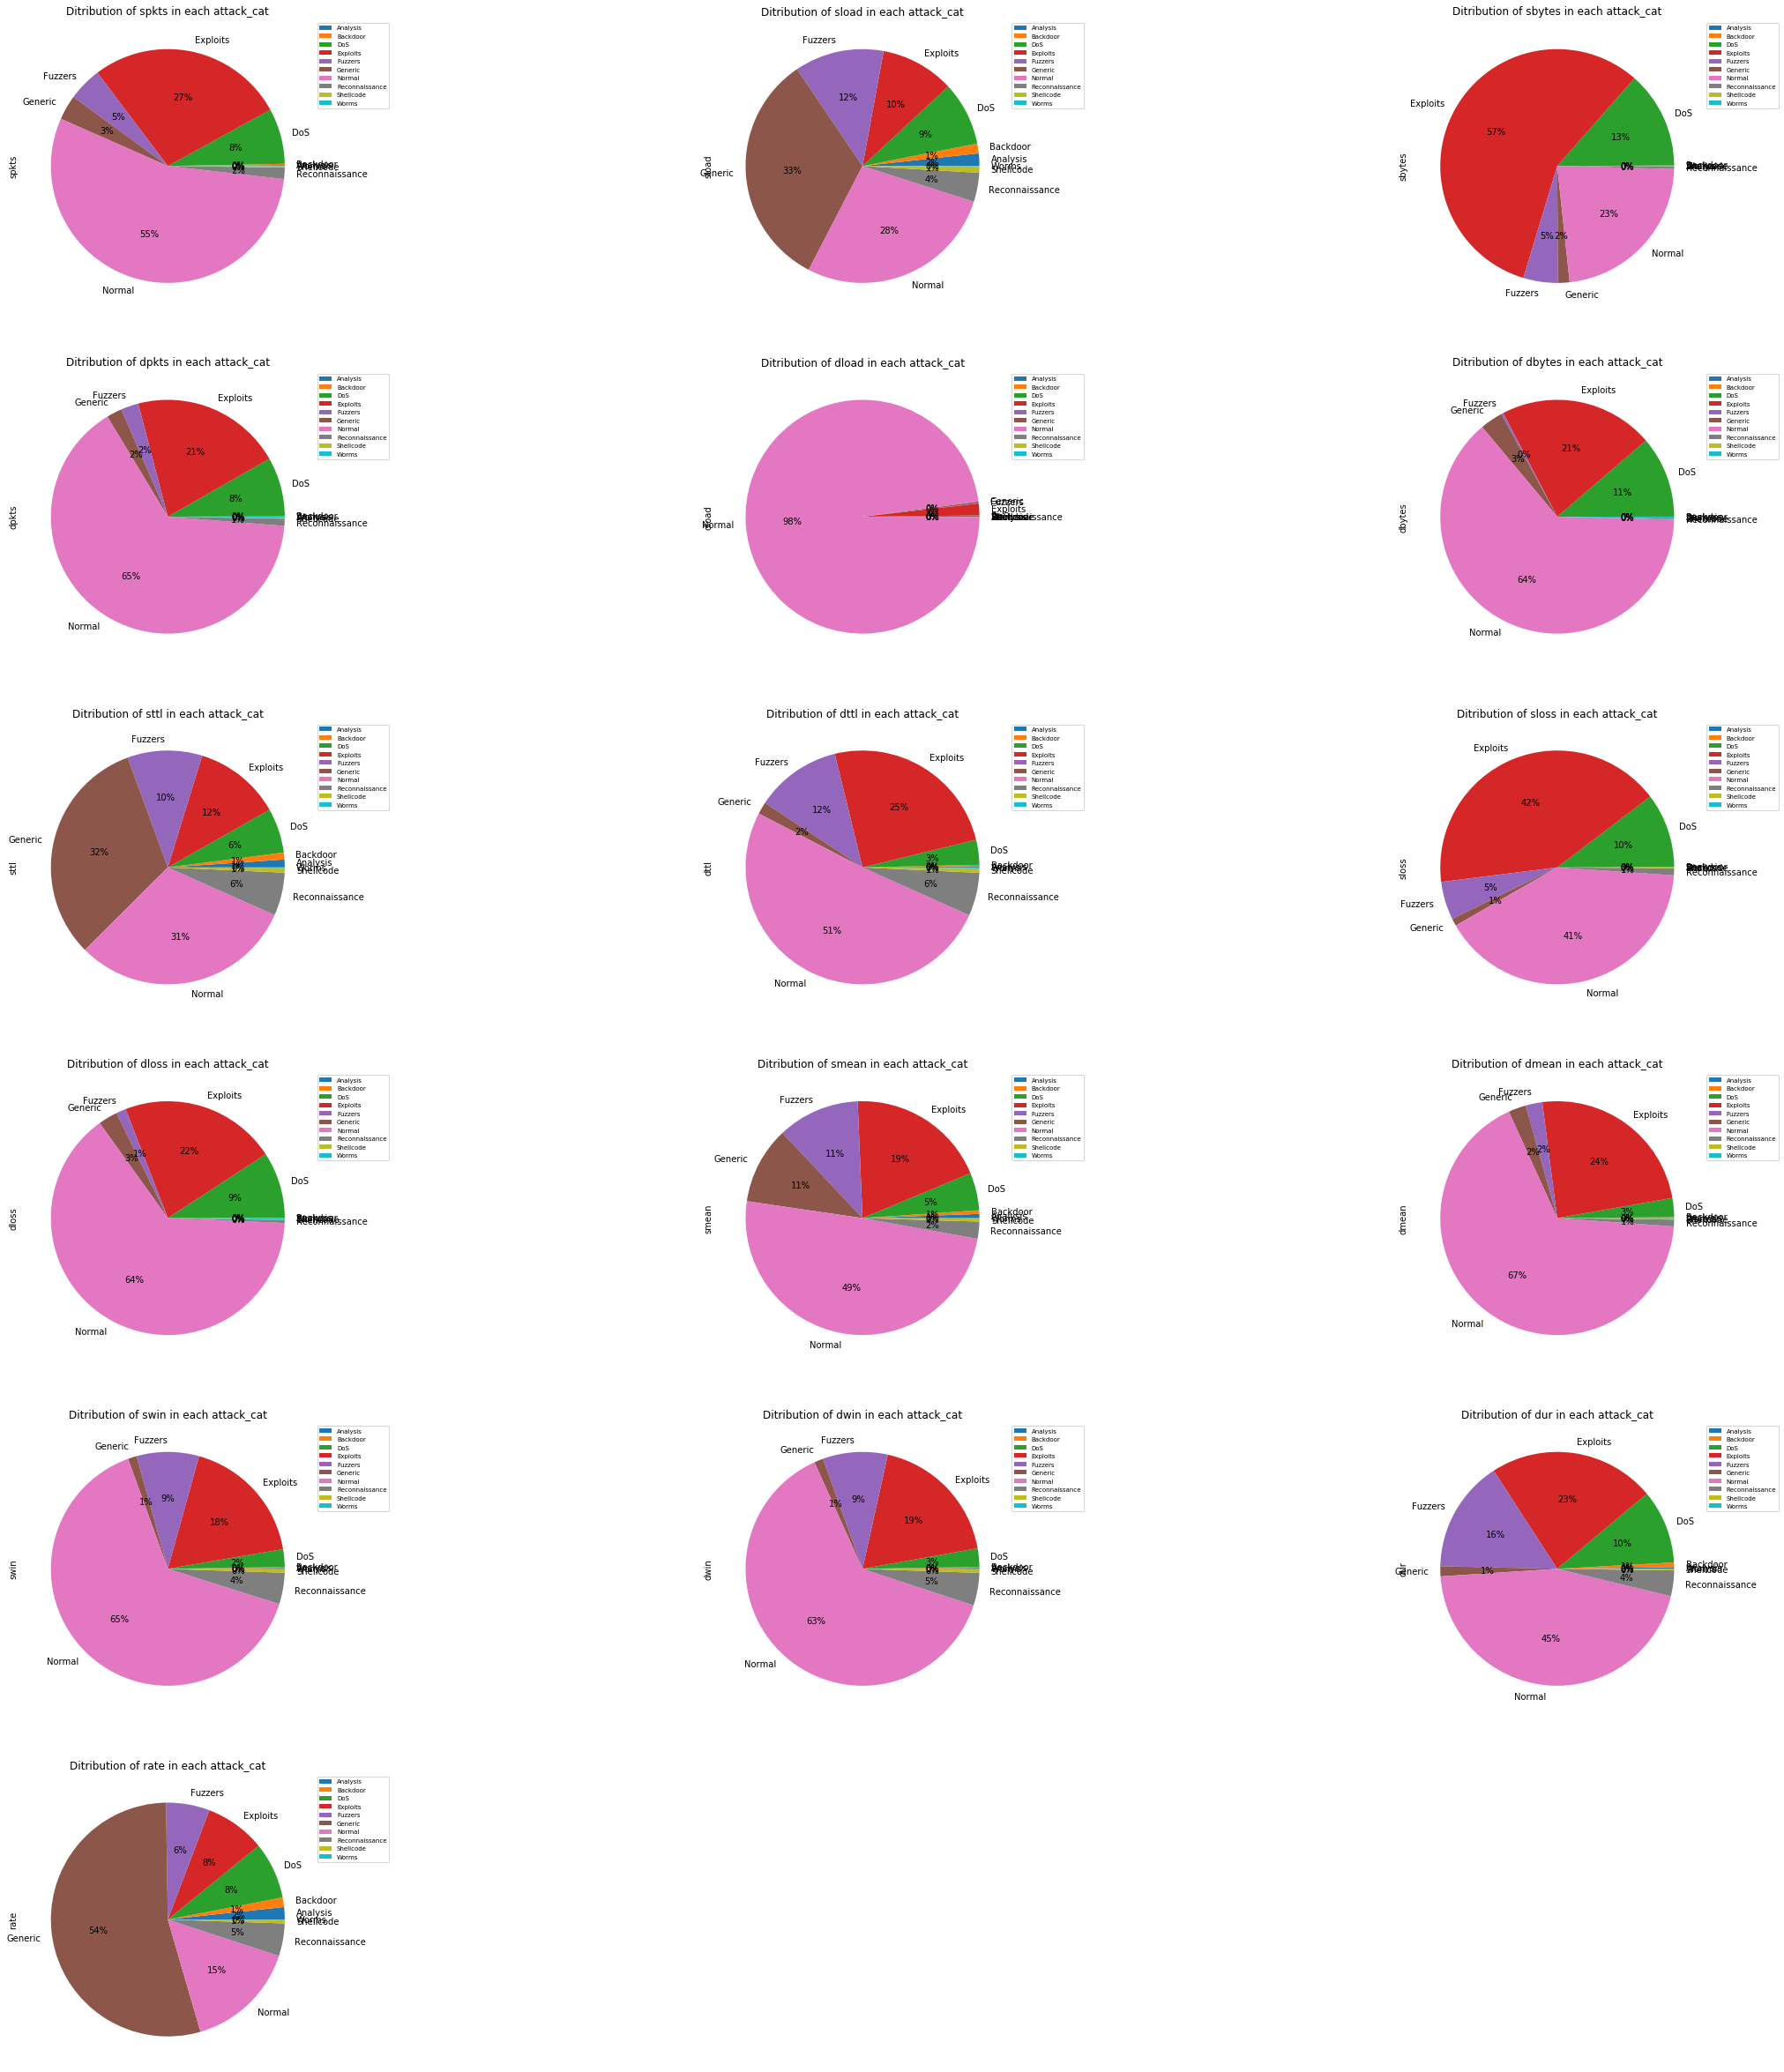

In [26]:
# Using Piechart to see distribution of source and destination in each attack_cat:

cols=['spkts','sload','sbytes','dpkts','dload','dbytes','sttl','dttl','sloss','dloss','smean','dmean','swin', 'dwin','dur','rate']
df_attack = df.groupby('attack_cat')
plt.figure(figsize=(40,50))

for i,col in enumerate(cols):
    plt.subplot(7,3,i+1)
    df_attack[col].sum().plot(kind='pie',  title=(f'Ditribution of {col} in each attack_cat'), autopct='%1.0f%%')
    labels=df_attack[col].sum().index
    plt.legend(labels=labels, loc="upper left", prop={'size': 7}, bbox_to_anchor=(1,1))
    
plt.show()

- Normal records have higher total number of packets transmitted from source to destination and conversely.
- Normal records have higher total average of the flow packet size transmitted by the src  and dst.
- Normal records have higher total destination packets retransmitted or dropped and for source both Normal records and Exploits Attack are high.
- Total number of bit seconds is high in Generic attack records for source and in destination, Normal records are high.
- Total number of bytes transaction from src to dst is high in Exploits Attack records and from dst to src is high in Normal records.
- Total value of time to live from src to dst is high in Generic Attack and Normal records, but from dst to src is high for Normal records.
- Normal records have higher total duration.
- Generic Attacks have higher total rate of packets per second in transaction.

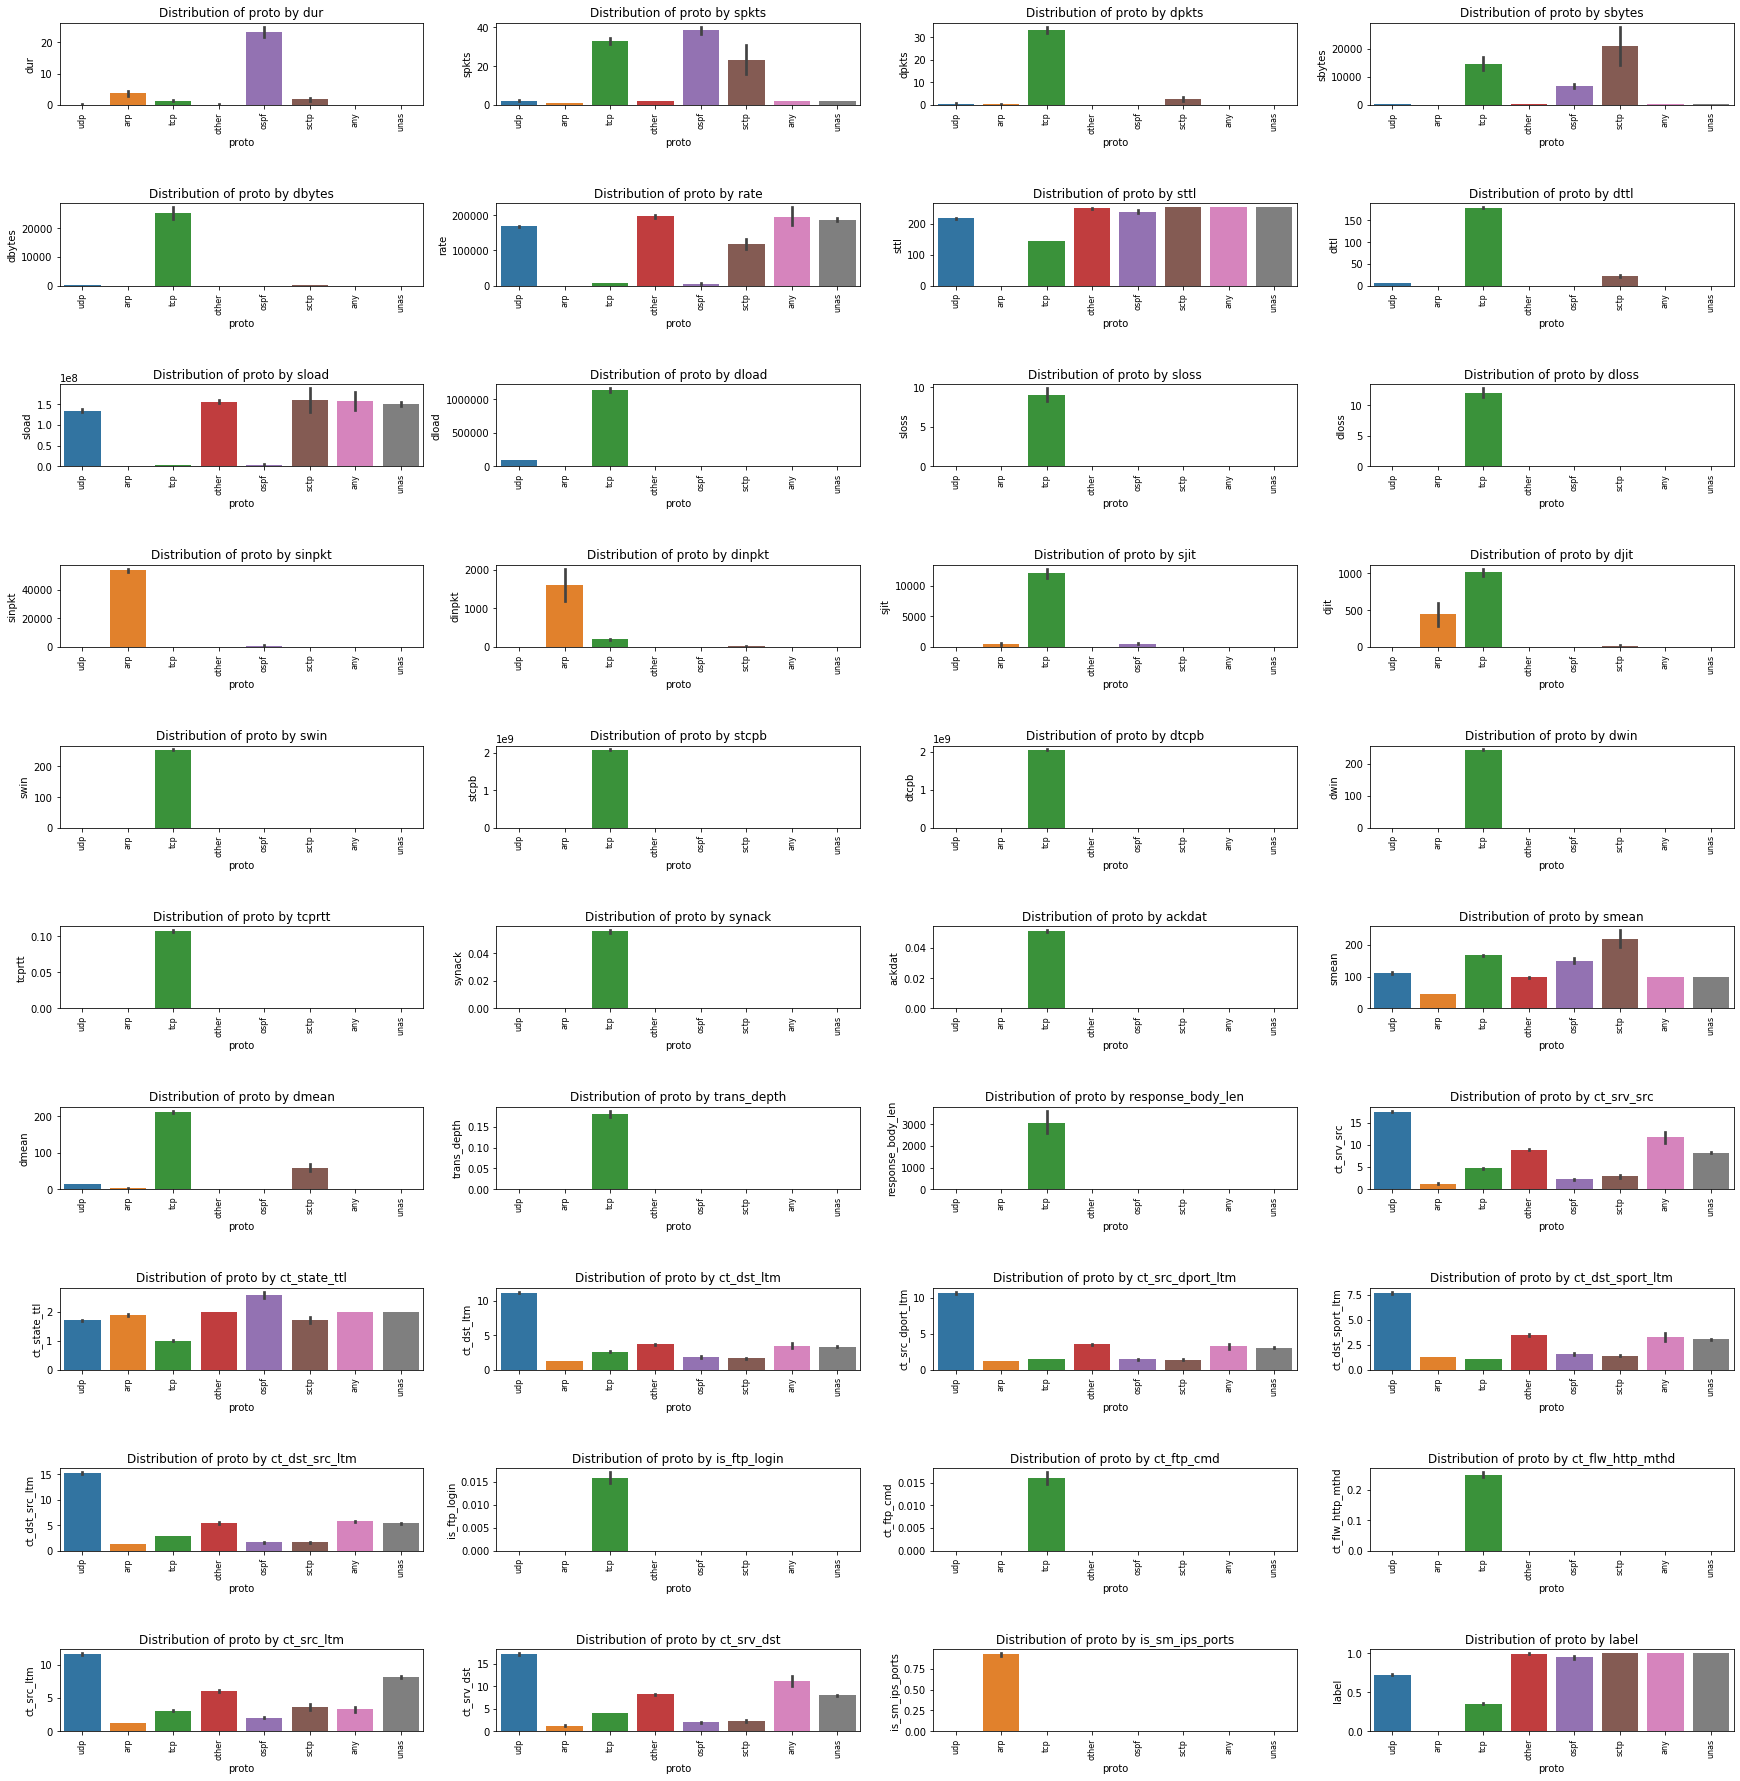

In [27]:
# Bivariate analysis of a continuous-categorical pair:

plt.figure(figsize=(30,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(12,4,i+1)
    sns.barplot(df['proto'], df[col])
    plt.title(f'Distribution of proto by {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 1.2, top = 0.7)
plt.show()

**-Protocol:**

- OSPF protocol has the highest total duration of records.
- OSPF protocol has the maximum number of packets and SCTP protocol has the highest number of bytes from source to destination.
- TCP protocol has the maximum number of packets (bytes) from destination to source.
- OSPF protocol has the lowest total transaction packets per second and longest is any.
- TCp protocol has the lowest time to live value from source to destination.
- UDP protocol has the lowest time to live value from destination to source.
- OSPF protocol has the lowest source bits per second and SCTP protocol has the maximum.
- TCP protocol has the maximum destination bits per secondbut.
- TCP  protocol has the maximum number of source and destination packets retransmitted or dropped. 
- SCTP protocol has the maximum mean of the flow packet size transmitted by the src, and for destination TCP protocol is the maximum.
- TCP protocol has the maximum number of Normal records.
- UDP protocol has the maximum number of Attack records and SCTP protocol has minimum number of Attack records.

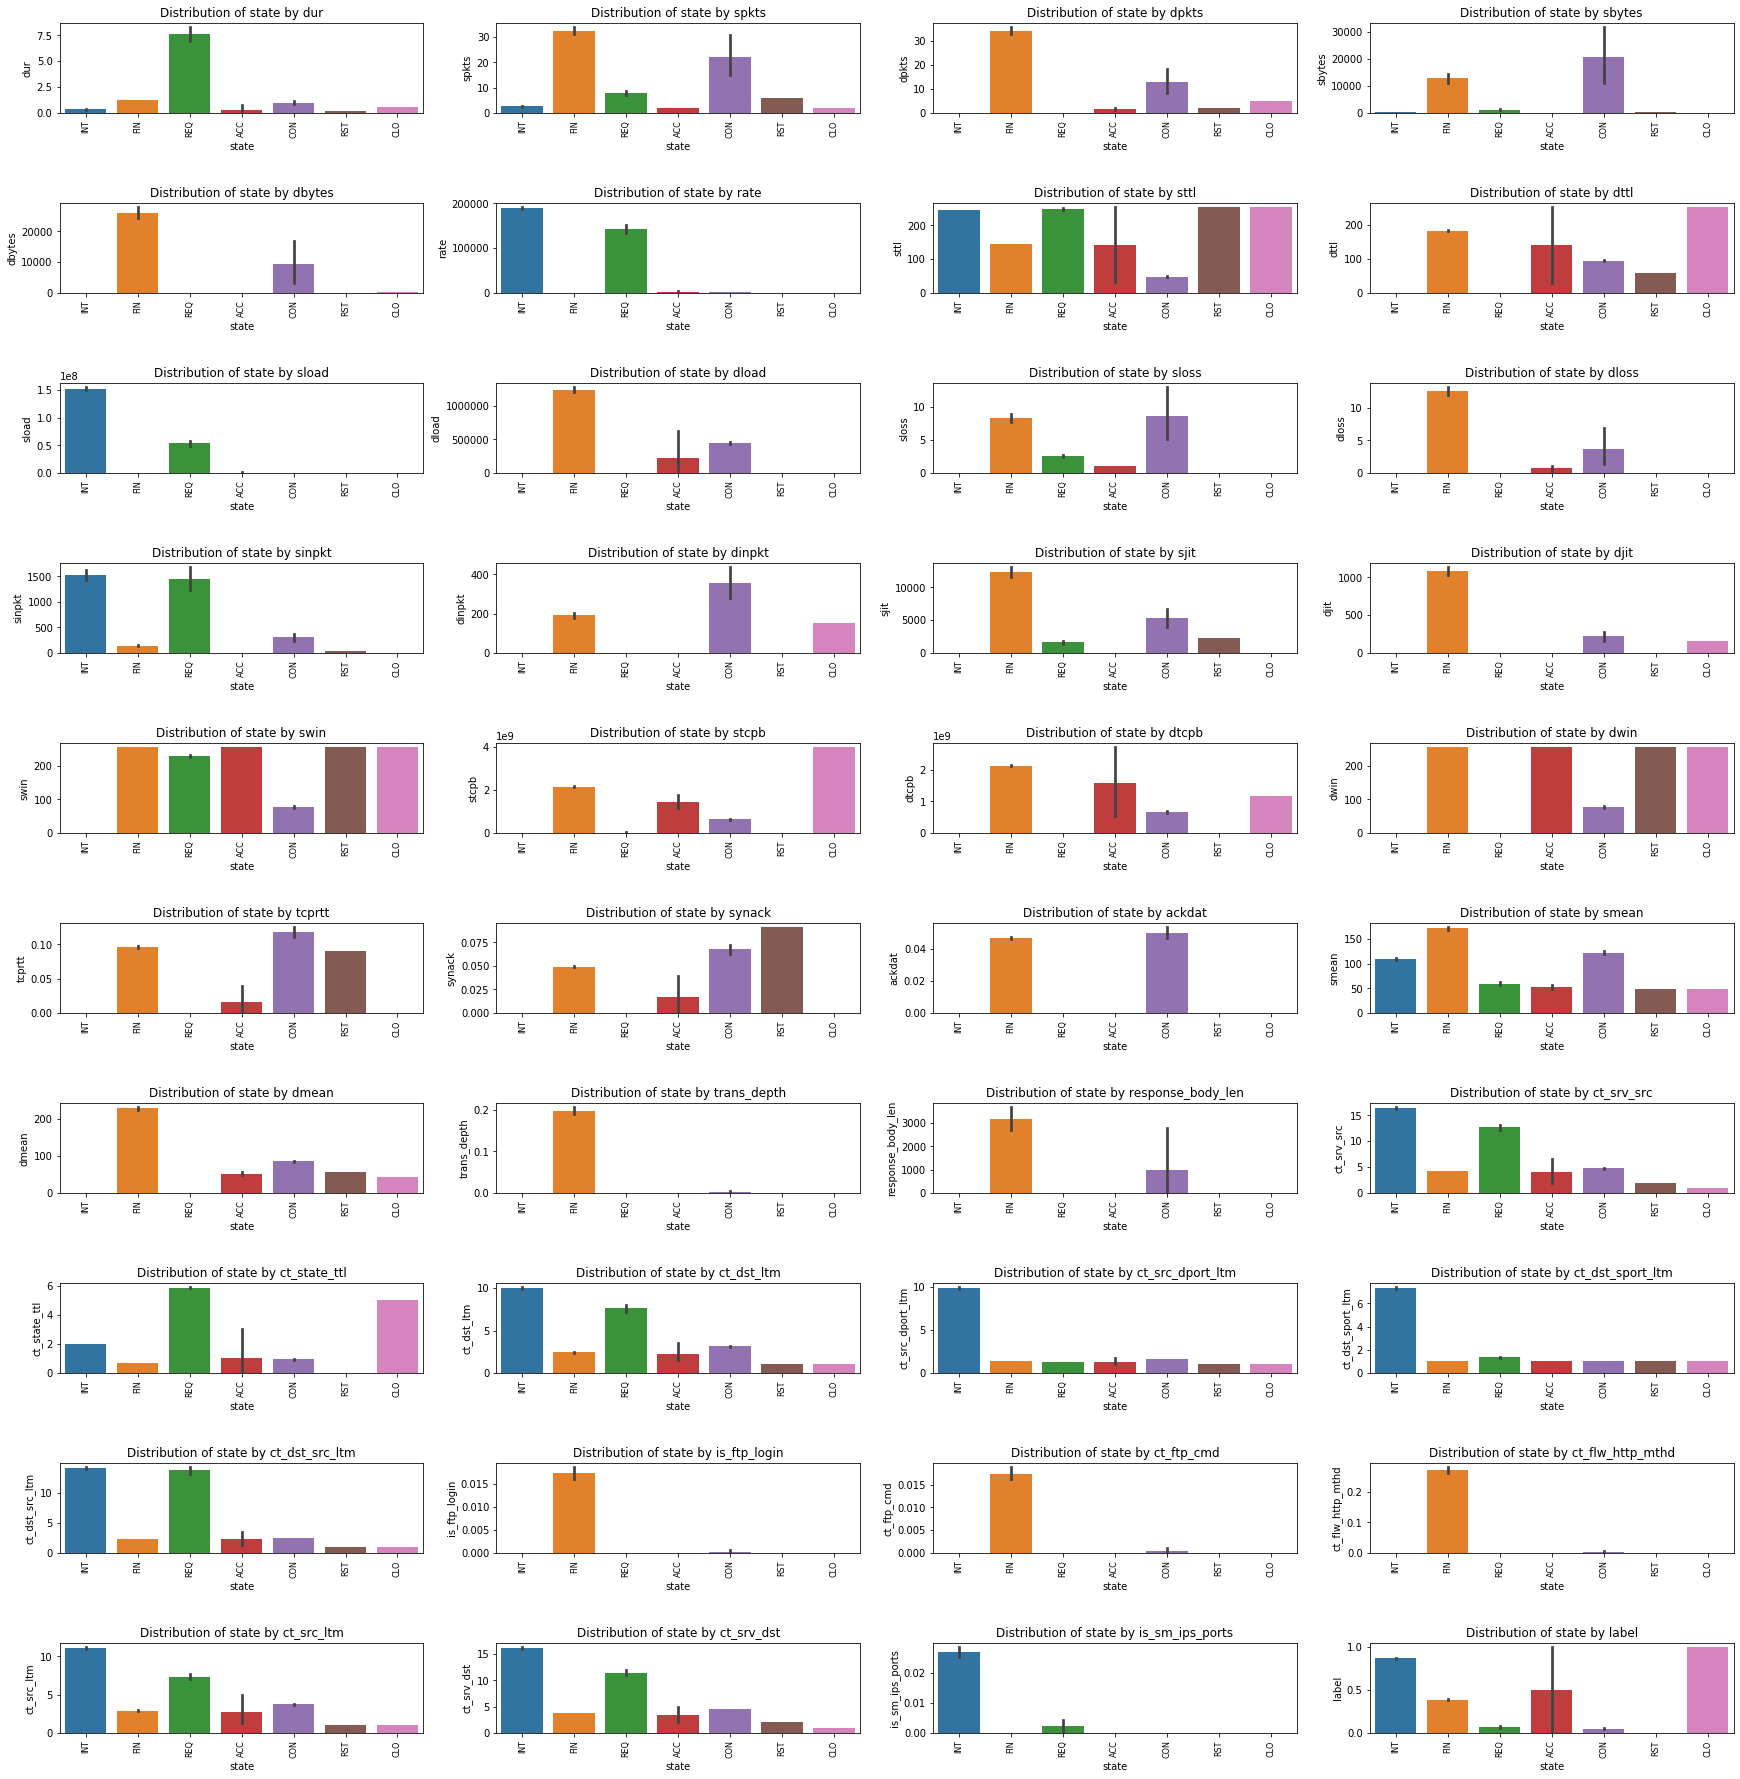

In [28]:
# Bivariate analysis of a continuous-categorical pair:

plt.figure(figsize=(30,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(12,4,i+1)
    sns.barplot(df['state'], df[col])
    plt.title(f'Distribution of state by {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 1, top = 0.7)
plt.show()

**-Transaction State:**

- REQ state has the highest total duration of records.
- FIN state has the maximum number of packets and CON state has maximum number of bytes from source to destination.
- FIN state has the maximum number of packets (bytes) from destination to sourc.
- INT state has the maximum total transaction packets per second and longest is any.
- CON state has the lowest time to live value from Source to destination.
- CLO state has the longest time to live value from destination to source and INT , REQ lowest.
- INT state has the maximum source bits per second.
- FIN state has the maximum destination bits per secondbut.
- CON and FIN states have the maximum number of source packets retransmitted or dropped and FIN for destination. 
- SCTP state has the maximum mean of the flow packet size transmitted by the src, and for destination TCP protocol is the maximum.
- FIN state has the maximum number of Normal recordsbut less than Attack records.
- INT state has the maximum number of Attack records and CON, REQ, RST and ACC states have the minimum number of Attack records.

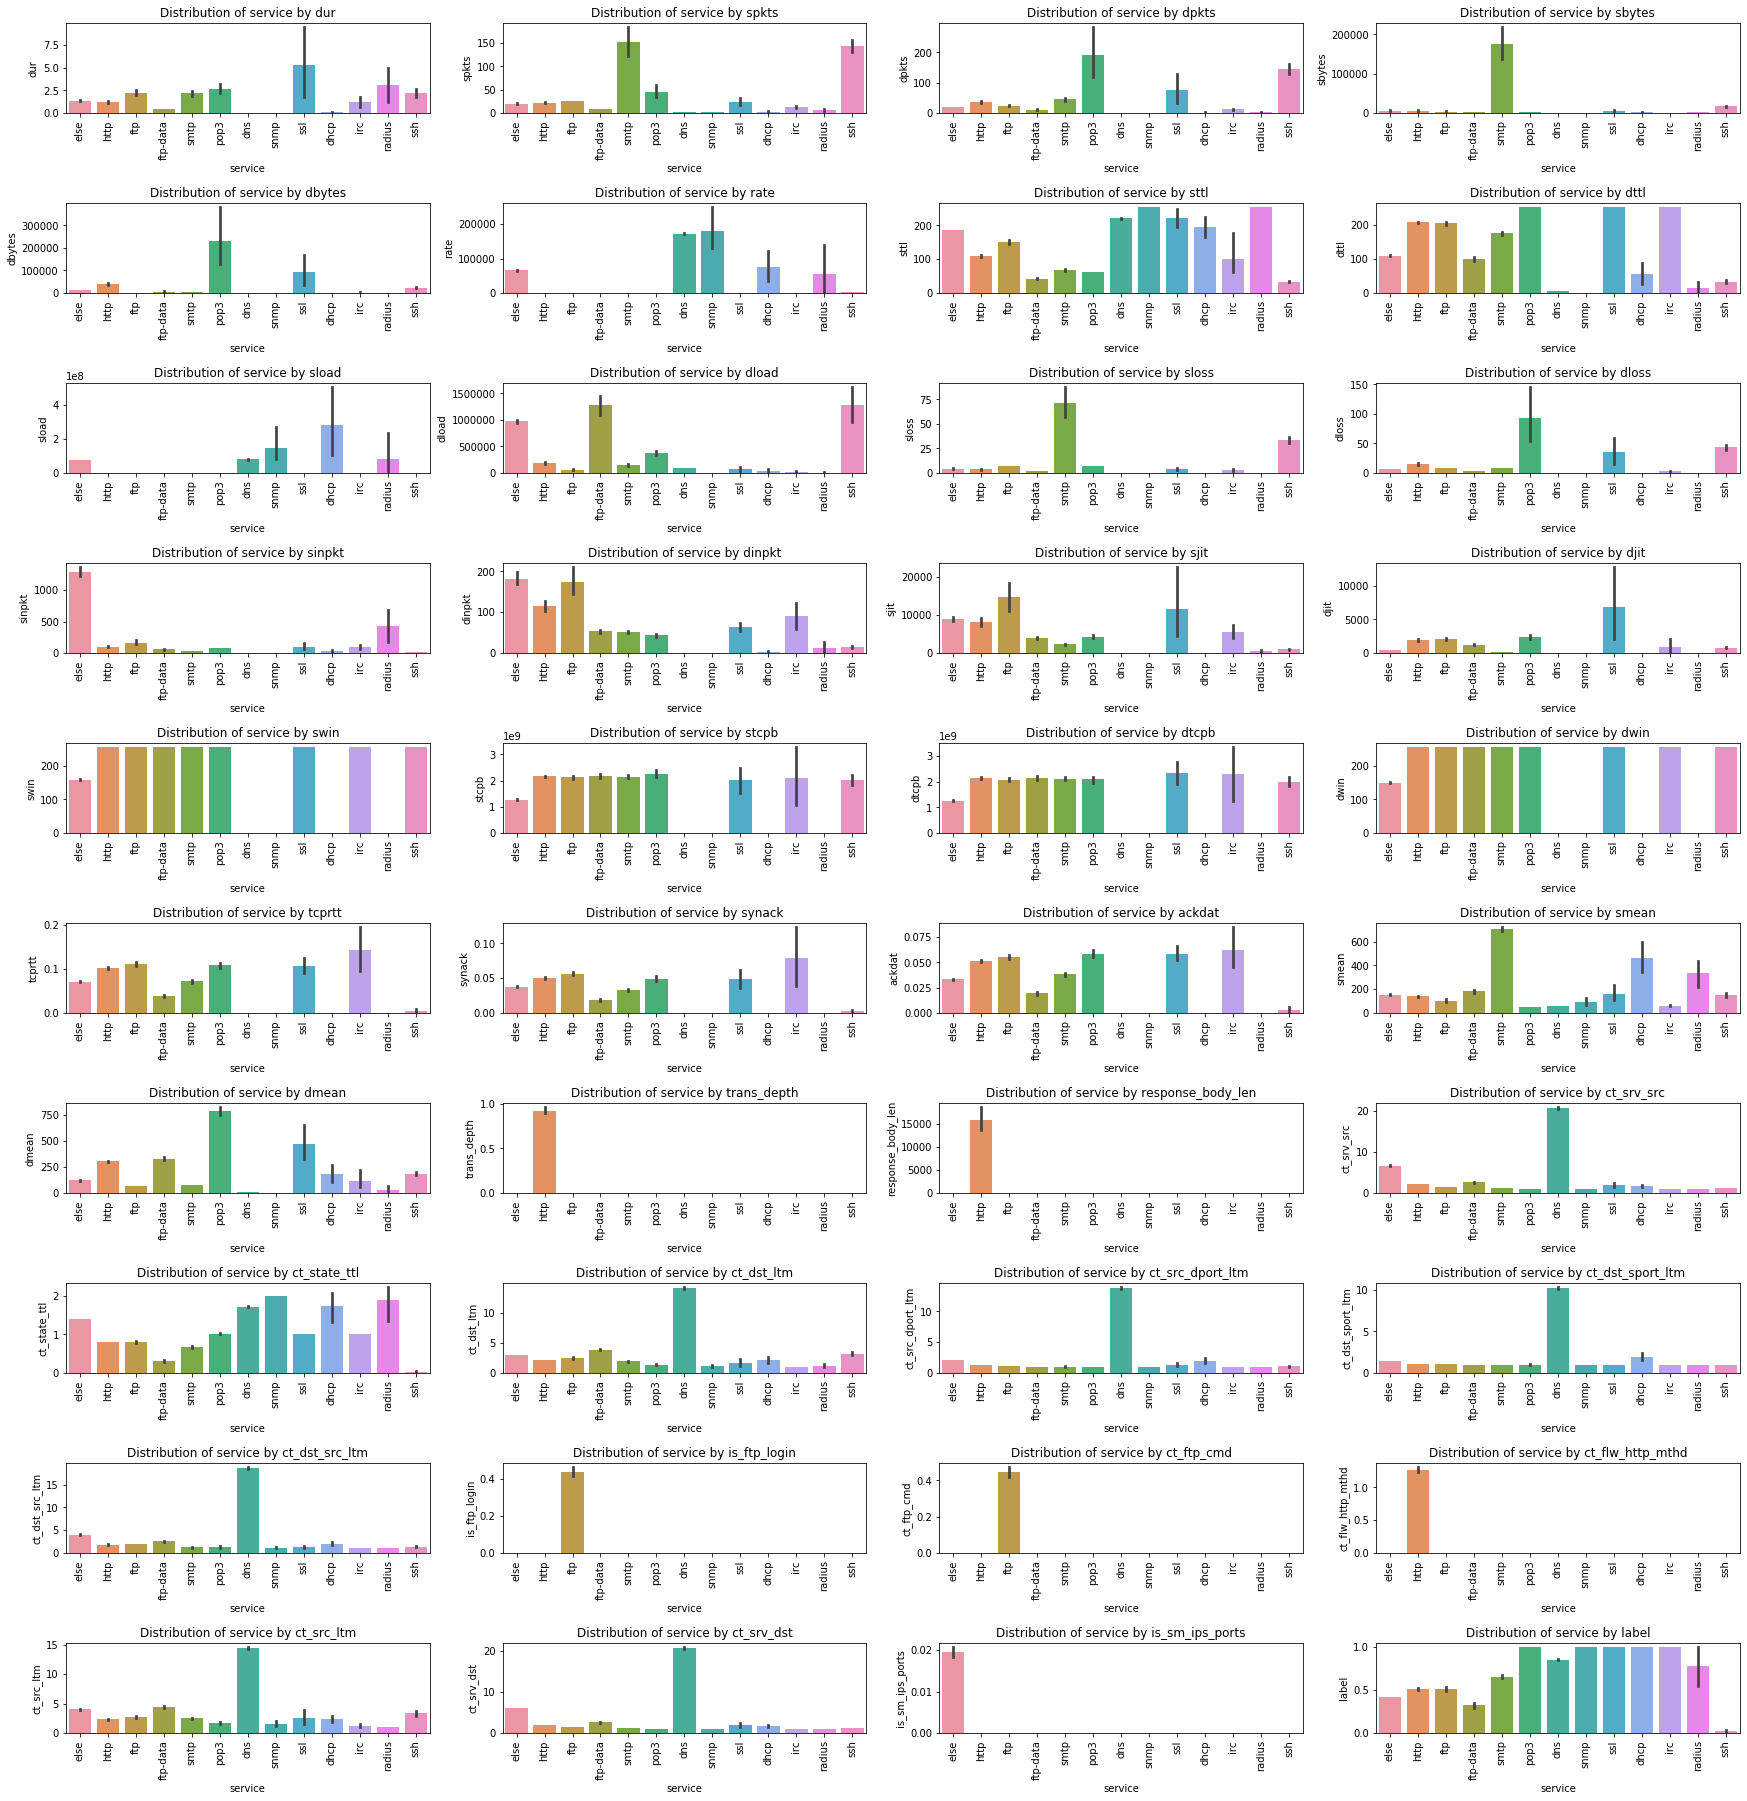

In [29]:
# Bivariate analysis of a continuous-categorical pair:

plt.figure(figsize=(30,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(12,4,i+1)
    sns.barplot(df['service'], df[col])
    plt.title(f'Distribution of service by {col}')
    plt.xticks(rotation=90, fontsize=10)
plt.subplots_adjust(hspace = 1, top = 0.7)
plt.show()

**-Service:**

- SSL service has the highest total duration of records.
- SMTP service has the maximum number of packets (bytes) from source to destination.
- POP3 service has the maximum number of packets (bytes) from destination to source.
- SMTP service has the maximum total transaction packets per second.
- SNMP and Radius services have the longest time to live value from Source to destination and SSH service is the lowest.
- POP3, SSL and IRC services have the longest time to live value from destination to source and SNMP is the lowest.
- DHCP service has the maximum source bits per second.
- FTP_data service has the maximum destination bits per secondbut.
- SMTP service has the maximum number of source packets retransmitted or dropped. 
- POP3 service has the maximum number of destination packets retransmitted or dropped.
- SMTP service has the maximum mean of the flow packet size transmitted by the src, and for destination POP3 service is the maximum.
- DNS service has the maximum number of Attack records.

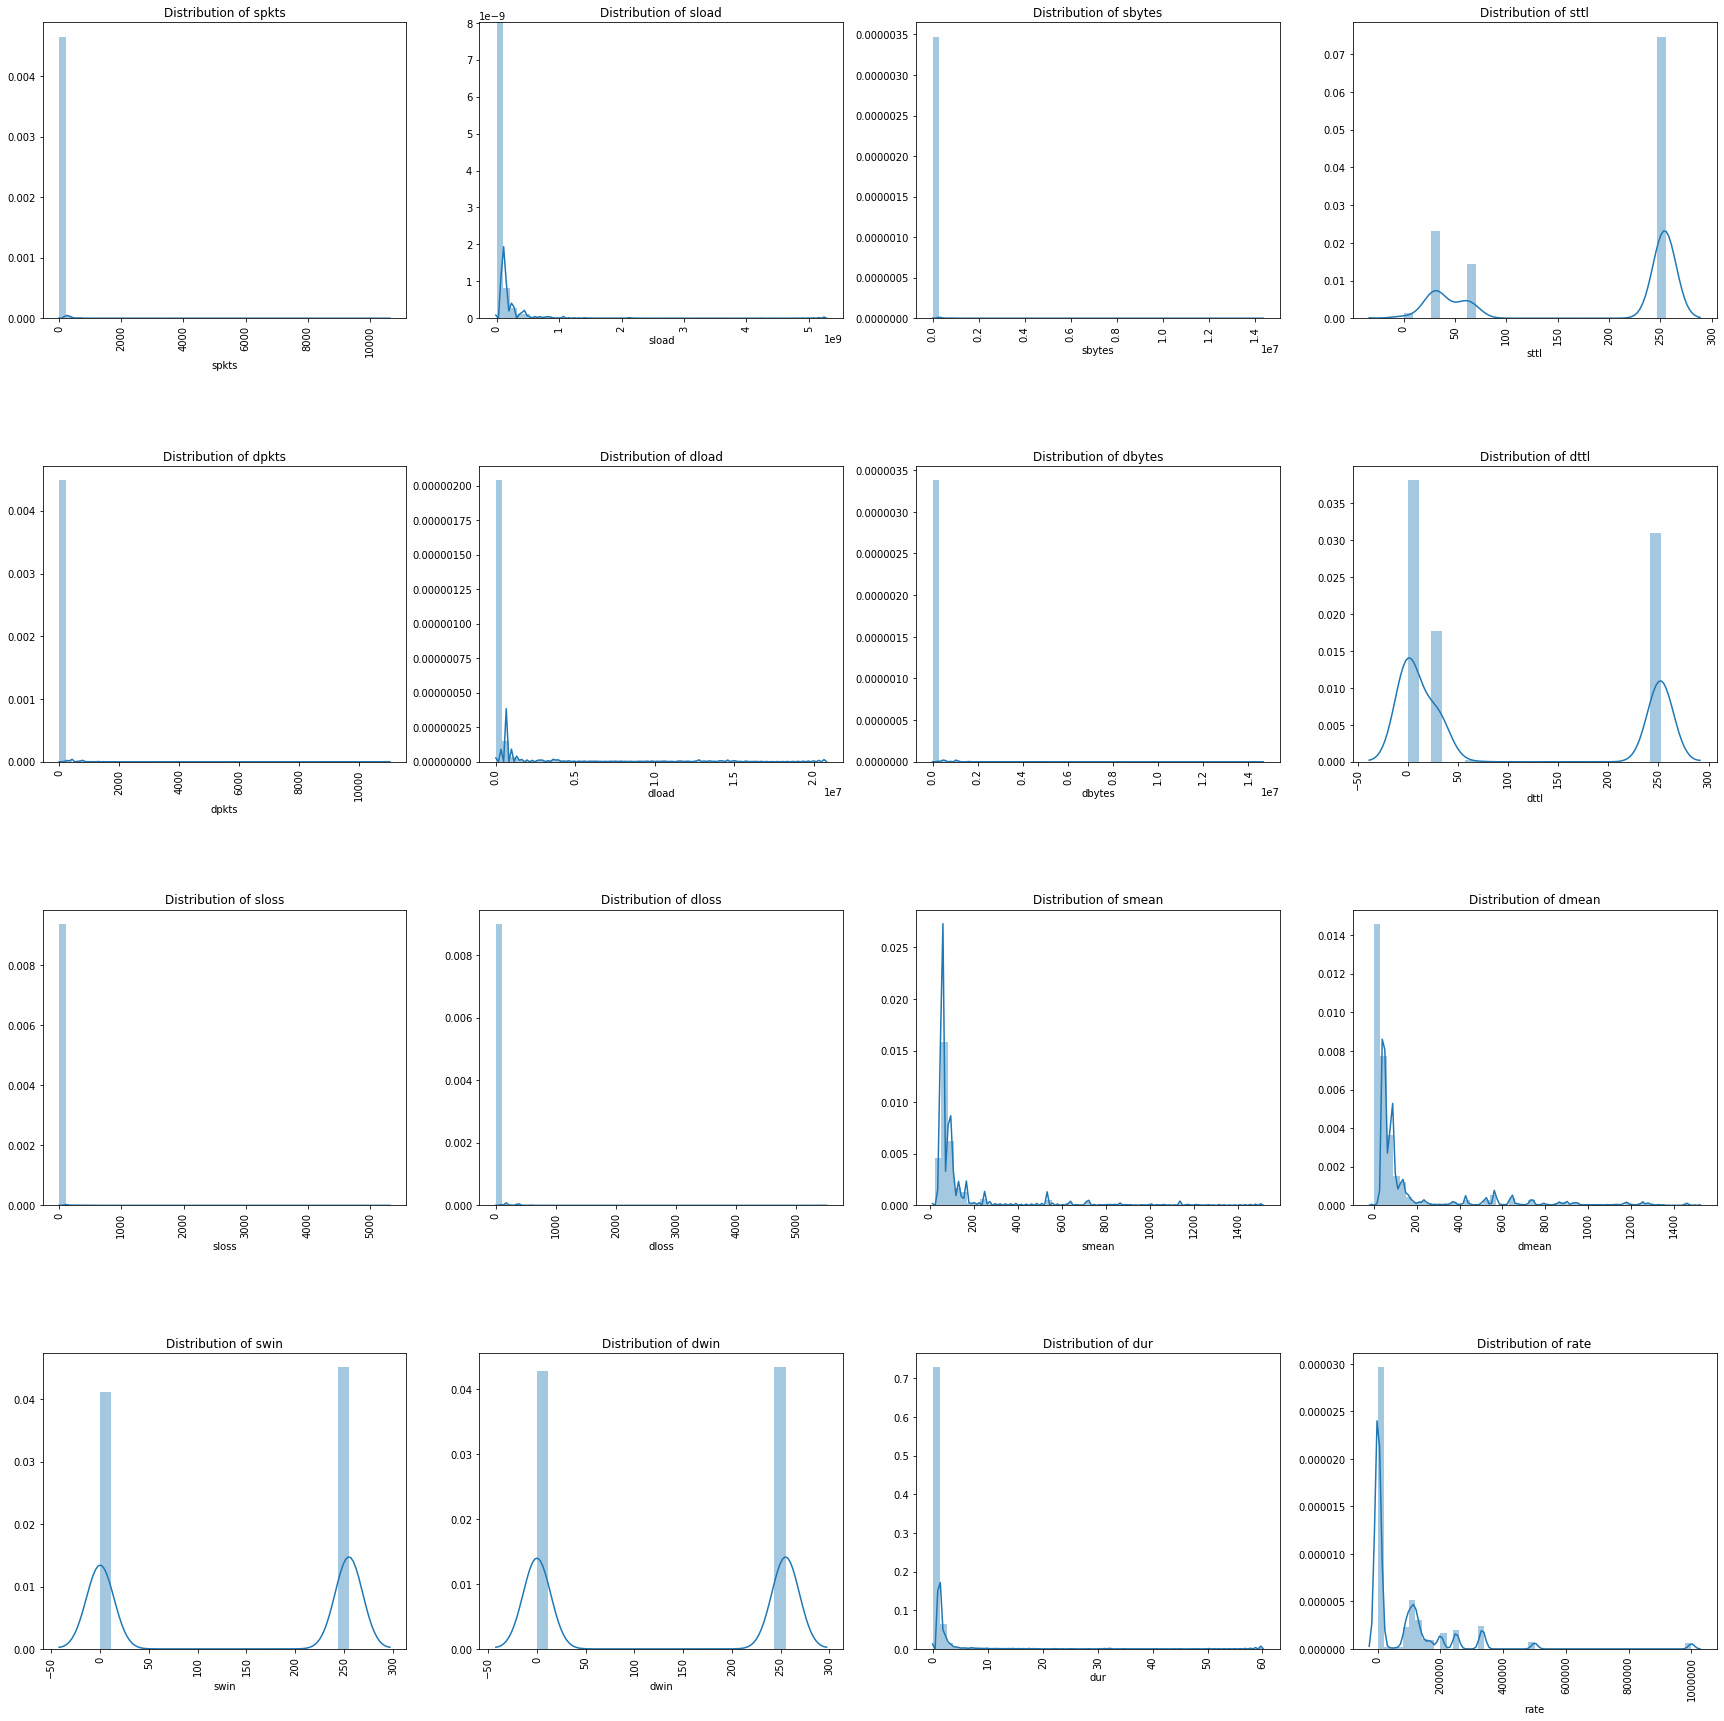

In [30]:
# Look at the distribution of some source and destination columns:

cols=['spkts','sload','sbytes','sttl','dpkts','dload','dbytes','dttl','sloss','dloss','smean','dmean','swin', 'dwin', 'dur','rate']

plt.figure(figsize=(30,50))
for i,col in enumerate(cols):
    plt.subplot(5,4,i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90, fontsize=10)
plt.subplots_adjust(hspace = 0.5, top = 0.7)
plt.show()

As you can see the distribution of source and destination almost the same, in sload,smean abit higher than dload,dmean and dttl higher than sttl. 

<Figure size 1800x720 with 0 Axes>

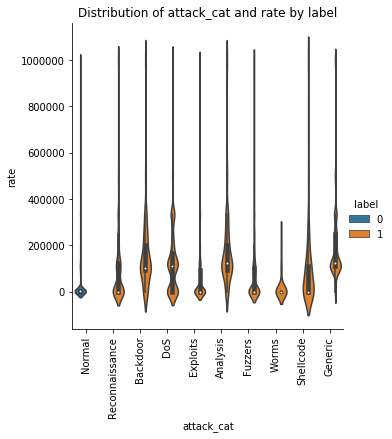

In [31]:
# Using violinplot to distribution of rate and attack_cat by label: 

plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y='rate', hue="label", kind="violin", split=False, data=df)
plt.title('Distribution of attack_cat and rate by label')
plt.xticks(rotation=90, fontsize=10)

plt.show()

As seen here, Average rate of Generic, Analysis and Backdoor are higher then others.

<Figure size 1800x720 with 0 Axes>

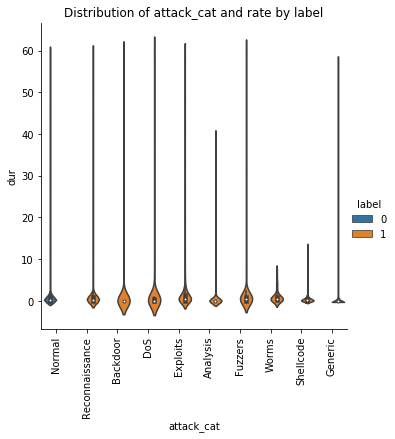

In [32]:
# Using violinplot to distribution of rate and attack_cat by label: 

plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y='dur', hue="label", kind="violin", split=False, data=df)
plt.title('Distribution of attack_cat and rate by label')
plt.xticks(rotation=90, fontsize=10)

plt.show()

Average duration of Fuzzers and Dos Attack are higher than others.

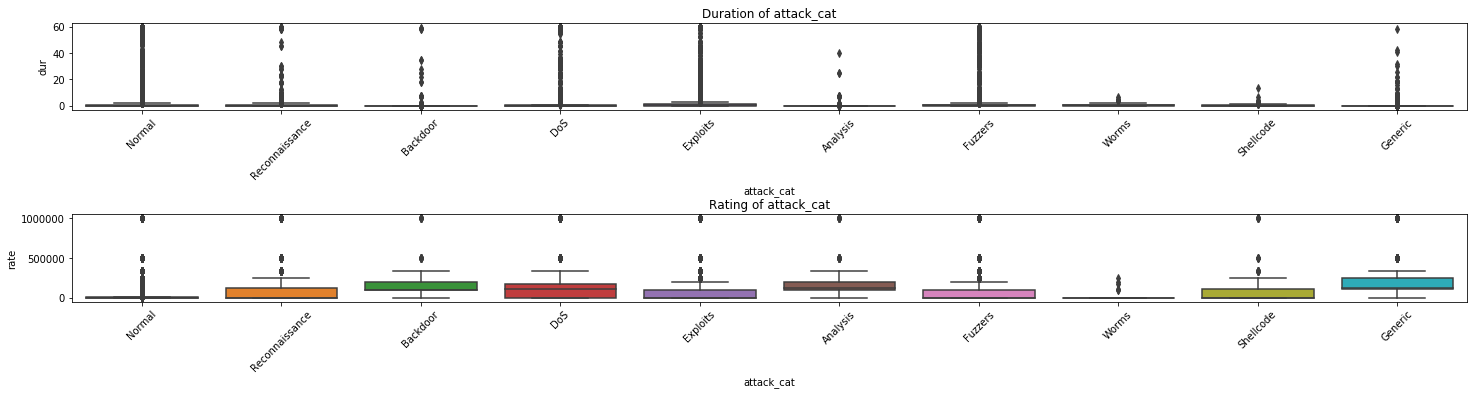

In [33]:
# Using violinplot to distribution of duration and attack_cat by label: 

plt.figure(figsize=(25,5))

plt.subplot(2,1,1)
sns.boxplot(x='attack_cat', y='dur', data=df)
plt.title('Duration of attack_cat')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sns.boxplot(x='attack_cat', y='rate', data=df)
plt.title('Rating of attack_cat')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace = 1.2, top = 0.9)
plt.show()

- Duration of Exploits and Fuzzers are higher than others, also Normal records has the same duration.
- Average rate of Dos, Analysis and Generic Attack are higher than others.

Text(0, 0.5, 'Number of Occurrence')

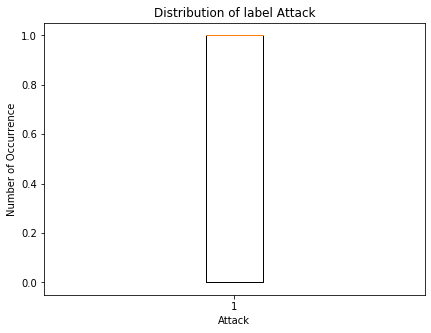

In [34]:
# Look at the distribution of target variable because target variable is binary use boxplot instead of hist plot:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(df['label'])
plt.title('Distribution of label Attack')
plt.xlabel("Attack")
plt.ylabel("Number of Occurrence")



As seen here, distribution of label as a target variable (Attack vs. Normal records). 

In [35]:
# Using T_test to determine if there is a significant difference between the Normal and Attack records in rate:


normal_record=df[df.label== 0].groupby('proto').rate.mean()
normal_record=np.array(normal_record)

attack_record= df[df.label==1].groupby('proto').rate.mean()
attack_record=np.array(attack_record)

scipy.stats.ttest_ind(normal_record, attack_record)


Ttest_indResult(statistic=-1.1215576226321629, pvalue=0.28825970237556875)

Pvalue is greater than 0.05 means the difference is not significant between Normal rate and Attack in each protocol.

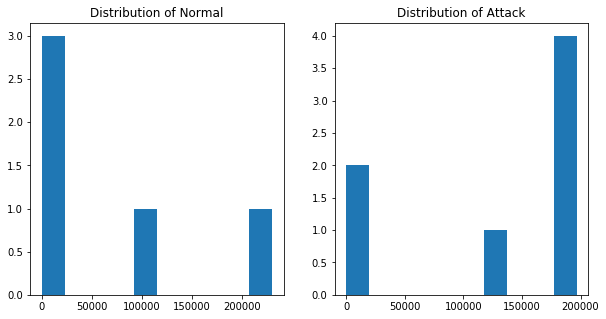

In [36]:
# I would first do hist for both, look at the dist, since t test is a parametric test, it requires normality.

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(normal_record)
plt.title('Distribution of Normal')

plt.subplot(1,2,2)
plt.hist(attack_record)
plt.title('Distribution of Attack')

plt.show()

As Shown the distribution of both plots are not normal.

In [37]:
# So try mannwhitneyu, which is non parametric test, doesn't require normality 

mannwhitneyu(normal_record, attack_record) 

MannwhitneyuResult(statistic=11.0, pvalue=0.16492959732773838)

Still,Pvalue is greater than 0.05 means the difference is not significant between Normal rate and Attack in each protocol.

**Preparing data for modeling:** 

- For modeling,need all columns to be numeric. To convert nonnumeric to numeric values, I can either use dummy variables or encode them. By using dummy, we can make  

In [38]:
# Convert nonnumeric column to numeric by using dummies:
                     
categorical = df.select_dtypes(include=['object']).drop('attack_cat',axis=1)
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,proto_arp,proto_ospf,proto_other,proto_sctp,proto_tcp,proto_udp,proto_unas,service_dns,service_else,service_ftp,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
# Drop nonnumeric columns variables after converting to dummies: 

df = df.drop(list(categorical.columns), axis=1)
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,1,3,0,0,0,2,3,0,Normal,0


In [40]:
# Concat dummies variables with dataset:

df = pd.concat([df, dummies], axis=1)
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,0,0,0,0,0,0,0,1,0,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,0,0,0,0,0,0,0,1,0,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,0,0,0,0,0,0,0,1,0,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,0,0,0,0,0,0,0,1,0,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Use train_test_split to create the necessary training and test groups:

x = df.drop(['id','label', 'attack_cat'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

**Applying Models:**

In [42]:
# Function Definition for model:

def get_scores(model, model_name):
    
    model.fit(X_train, y_train)
    
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
        
    train_probs = model.predict_proba(X_train)
    test_probs = model.predict_proba(X_test)
     
    
    print('{} has training accuracy of: {}'.format(model_name, accuracy_score(y_train, train_preds)))     
    print('{} has test accuracy of: {}\n'.format(model_name, accuracy_score(y_test, test_preds)))
    
    
    print('{} has training log loss of: {}'.format(model_name, log_loss(y_train, train_probs)))
    print('{} has test log loss of: {}\n'.format(model_name, log_loss(y_test, test_probs)))
    
            
    return train_preds, test_preds, train_probs, test_probs
 

**1- Preliminary Logistic Regression:**

In [43]:
# Applying logistic Regression model:

lr_initial = LogisticRegression(n_jobs=-1)

initial_lr_train_preds, initial_lr_test_preds, initial_lr_train_probs, initial_lr_test_probs = get_scores(lr_initial, ' Preliminary Logistic Regression')
 
lr_train_accuracy = accuracy_score(y_train, initial_lr_train_preds)
lr_test_accuracy = accuracy_score(y_test, initial_lr_test_preds)

lr_train_logloss = log_loss(y_train, initial_lr_train_probs)
lr_test_logloss = log_loss(y_test, initial_lr_test_probs)

 Preliminary Logistic Regression has training accuracy of: 0.755150687011311
 Preliminary Logistic Regression has test accuracy of: 0.7575757575757576

 Preliminary Logistic Regression has training log loss of: 0.5300521760251788
 Preliminary Logistic Regression has test log loss of: 0.5229950406527846



**2- Preliminary K Neighbors Classifier:**

In [44]:
# Applying KNeighbors Classifier model:


knn_initial = KNeighborsClassifier(n_jobs=-1)

initial_knn_train_preds, initial_knn_test_preds, initial_knn_train_probs, initial_knn_test_probs = get_scores(knn_initial, 'Preliminary KNN')

knn_train_accuracy = accuracy_score(y_train, initial_knn_train_preds)
knn_test_accuracy = accuracy_score(y_test, initial_knn_test_preds)

knn_train_logloss = log_loss(y_train, initial_knn_train_probs)
knn_test_logloss = log_loss(y_test, initial_knn_test_probs)

Preliminary KNN has training accuracy of: 0.8769756319744932
Preliminary KNN has test accuracy of: 0.8151454423999515

Preliminary KNN has training log loss of: 0.23148205573075972
Preliminary KNN has test log loss of: 0.8659912845891427



As you can see the test log loss is greater then training, so need normalize.

**3- Preliminary Random Forest Classifier:**

In [45]:
# Applying Random Forest Classifier model:

rfc_initial = RandomForestClassifier(n_jobs=-1)

initial_rfc_train_preds, initial_rfc_test_preds, initial_rfc_train_probs, initial_rfc_test_probs = get_scores(rfc_initial,'Preliminary Random Forest')


rfc_train_accuracy = accuracy_score(y_train, initial_rfc_train_preds)
rfc_test_accuracy = accuracy_score(y_test, initial_rfc_test_preds)

rfc_train_logloss = log_loss(y_train, initial_rfc_train_probs)
rfc_test_logloss = log_loss(y_test, initial_rfc_test_probs)

Preliminary Random Forest has training accuracy of: 0.9981932741213088
Preliminary Random Forest has test accuracy of: 0.9744944434323192

Preliminary Random Forest has training log loss of: 0.020770300317098492
Preliminary Random Forest has test log loss of: 0.1240303213941553



**4- Preliminary Gradient Boosting Classifier:**

In [46]:
# Applying Gradoint Boosting Classifier:

gbc_initial = GradientBoostingClassifier()

initial_gbc_train_preds, initial_gbc_test_preds, initial_gbc_train_probs, initial_gbc_test_probs = get_scores(gbc_initial, 'Preliminary Gradient Boosting')


gbc_train_accuracy = accuracy_score(y_train, initial_gbc_train_preds)
gbc_test_accuracy = accuracy_score(y_test, initial_gbc_test_preds)

gbc_train_logloss = log_loss(y_train, initial_gbc_train_probs)
gbc_test_logloss = log_loss(y_test, initial_gbc_test_probs)

Preliminary Gradient Boosting has training accuracy of: 0.9592196158809686
Preliminary Gradient Boosting has test accuracy of: 0.9591303819760734

Preliminary Gradient Boosting has training log loss of: 0.11911188461051604
Preliminary Gradient Boosting has test log loss of: 0.1160901928309561



In [47]:
# Create a dataFrame with accuracy of different models using dictionary:
    
preliminary_model_accuracy=pd.DataFrame({"Models":['Preliminary Logistic Regression', 'Preliminary KNN', 'Preliminary Random Forest', 'Preliminary Gradient Boosting'], 
                 "Training Accuracy":[lr_train_accuracy, knn_train_accuracy, rfc_train_accuracy, gbc_train_accuracy],
                 "Test Accuracy":[lr_test_accuracy, knn_test_accuracy, rfc_test_accuracy, gbc_test_accuracy],
                 "Training Log Loss":[lr_train_logloss, knn_train_logloss, rfc_train_logloss, gbc_train_logloss],
                 "Test Log Loss":[lr_test_logloss, knn_test_logloss, rfc_test_logloss, gbc_test_logloss]}) 
 
 
preliminary_model_accuracy

,Models,Training Accuracy,Test Accuracy,Training Log Loss,Test Log Loss
0,Preliminary Logistic Regression,0.755151,0.757576,0.530052,0.522995
1,Preliminary KNN,0.876976,0.815145,0.231482,0.865991
2,Preliminary Random Forest,0.998193,0.974494,0.020770,0.124030
3,Preliminary Gradient Boosting,0.959220,0.959130,0.119112,0.116090


As shown in above summary, training accuracies range (Number of correct predictions/Total number of predictions) from 75% to 99% and test accuracies range between 75% to 97%. The knn model has the most overfitting because the value of test accuracy is much lower than training accuracy compared with other models. These overfitting trends are similar in the log loss scoring (log loss:uncertainly). So the best test accuracy and test log loss score goes to Gradient Boosting model. should be noted that these initial models are not optimized; I only use the default hyperparameters.

**- Improving Scores**

- Feature Engineering 

   - I have already done some feature engineering by converting nonnumeric columns to numeric. 

   - Using PCA for dimentional reduction.
   
- Adding External Data Source

- Optimizing model by using Scale and Grid Search CV (find best parameters)

**- Applying PCA:**

In [48]:
# Applying PCA for feature reduction: 

X = df.drop(['label','id','attack_cat'], axis = 1)
Y = df['label']      

x = StandardScaler().fit_transform(X)
pca = PCA(0.90)
principalComponents = pca.fit_transform(x)

In [49]:
# Look at the pca components:
print(abs( pca.components_ )) 

[[3.64975114e-02 3.93819216e-02 5.01901589e-02 ... 2.40114293e-01
  1.52037658e-02 4.83681188e-04]
 [1.85898690e-03 8.25557199e-02 1.37200225e-01 ... 1.12353212e-01
  5.42096049e-02 1.00922158e-03]
 [1.32105850e-01 2.88923681e-01 4.09232127e-01 ... 3.13534604e-02
  6.73592544e-03 4.56007683e-04]
 ...
 [3.12035988e-02 1.46537906e-02 1.28493157e-01 ... 1.32050994e-01
  2.46829139e-02 2.14156073e-03]
 [1.48504162e-02 3.55964437e-04 1.26210597e-01 ... 1.05349078e-01
  2.52245711e-02 2.19017538e-03]
 [4.36441176e-02 3.12759096e-04 4.04865586e-03 ... 4.28676439e-02
  4.79234715e-03 1.11567621e-03]]


In [50]:
# Find out the number of components that explain 90% of variance in the dataset:
pca_number = pca.n_components_
print(pca_number)

29


In [51]:
# print the percentage of total variance in the dataset explained by each components:
print(
    'The percentage of total variance in the dataset explained by each, component from Sklearn PCA.\n',
    pca.explained_variance_ratio_ ,pca.explained_variance_ratio_.sum() 
)

The percentage of total variance in the dataset explained by each, component from Sklearn PCA.
 [0.20029055 0.06791527 0.05881177 0.0485079  0.0449583  0.04140923
 0.03936591 0.03395662 0.03298153 0.03102675 0.02610343 0.02201845
 0.0186592  0.01772474 0.01662848 0.01638946 0.01584064 0.01582927
 0.01569783 0.01567189 0.01563038 0.01562724 0.01562475 0.0156134
 0.01560009 0.01531596 0.01249299 0.01212846 0.01044998] 0.9082704669983149


In [52]:
# Convert PCA to dataframe:

principalDf = pd.DataFrame(data = principalComponents, columns = ['pca' + str(i) for i in range (1, pca_number+1)])
principalDf.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29
0,-1.618412,-2.678773,0.393685,0.433996,-1.105472,0.015657,0.184038,0.462596,-0.000417,0.001238,...,0.088871,0.001659,-0.003799,0.011538,-0.034074,0.039191,-0.620132,-0.201575,0.151466,0.234370
1,-1.882702,-3.173644,0.483039,1.386136,-1.675106,-0.007209,0.130033,0.373932,0.115795,0.622778,...,-0.525904,-0.010093,-0.032791,0.043807,0.331398,0.479515,-1.045525,-1.249053,1.026420,0.087509
2,-2.095302,-3.088554,0.453799,1.062860,-1.644603,0.106990,0.286588,0.365879,0.168263,0.597432,...,-0.531998,0.000083,-0.031768,0.042103,0.326893,0.450789,-1.143069,-0.895151,0.731541,-0.109194
3,-2.011009,-2.819278,0.412798,0.848613,-1.404477,0.077078,0.235497,0.353295,0.111504,0.384827,...,-0.309110,0.000541,-0.021502,0.030618,0.197973,0.298960,-0.914096,-0.668391,0.542958,0.019622
4,-1.921230,-3.003332,0.461937,1.539799,-1.602150,-0.050924,0.034345,0.296601,0.096235,0.621042,...,-0.499634,-0.016016,-0.032113,0.043410,0.320028,0.476145,-0.932340,-1.425080,1.171719,0.202087


In [53]:
# Add target variable:

principalDf['label'] = df['label']
principalDf.dropna(inplace=True)


In [54]:
# Split the PCA dataset:

x = principalDf.drop(['label'], 1)
y = principalDf['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

**Applying model after PCA:**

   **1.1 Logistic Regression:**

In [55]:
# Applying logistic Regression model After applying PCA:

lr_pca = LogisticRegression( n_jobs=-1)

lr_pca_train_preds, lr_pca_test_preds, lr_pca_train_probs, lr_pca_test_probs = get_scores(lr_pca, 'Logistic Regression after Applying PCA')


lr_pca_train_accuracy = accuracy_score(y_train, lr_pca_train_preds)
lr_pca_test_accuracy = accuracy_score(y_test, lr_pca_test_preds)

lr_pca_train_logloss = log_loss(y_train, lr_pca_train_probs)
lr_pca_test_logloss = log_loss(y_test, lr_pca_test_probs)

Logistic Regression after Applying PCA has training accuracy of: 0.868397479693312
Logistic Regression after Applying PCA has test accuracy of: 0.8730794923179692

Logistic Regression after Applying PCA has training log loss of: 0.2724147430493027
Logistic Regression after Applying PCA has test log loss of: 0.2676352892234881



**2.1 K Neighbors Classifier:**

In [56]:
# Applying KNeighbors Classifier model after Applying PCA:


knn_pca = KNeighborsClassifier(n_jobs=-1)

knn_pca_train_preds, knn_pca_test_preds, knn_pca_train_probs, knn_pca_test_probs = get_scores(knn_pca, 'KNN after Applying PCA')


knn_pca_train_accuracy = accuracy_score(y_train, knn_pca_train_preds)
knn_pca_test_accuracy = accuracy_score(y_test, knn_pca_test_preds)

knn_pca_train_logloss = log_loss(y_train, knn_pca_train_probs)
knn_pca_test_logloss = log_loss(y_test, knn_pca_test_probs)

KNN after Applying PCA has training accuracy of: 0.9443255143095726
KNN after Applying PCA has test accuracy of: 0.9171676686706747

KNN after Applying PCA has training log loss of: 0.11049130305883274
KNN after Applying PCA has test log loss of: 0.574714384205064



**3.1 Random Forest Classifier:**

In [57]:
# Applying Random Forest Classifier model after Applying PCA:

rfc_pca = RandomForestClassifier(n_jobs=-1)

rfc_pca_train_preds, rfc_pca_test_preds, rfc_pca_train_probs, rfc_pca_test_probs = get_scores(rfc_pca,'Random Forest after Applying PCA')


rfc_pca_train_accuracy = accuracy_score(y_train, rfc_pca_train_preds)
rfc_pca_test_accuracy = accuracy_score(y_test, rfc_pca_test_preds)

rfc_pca_train_logloss = log_loss(y_train, rfc_pca_train_probs)
rfc_pca_test_logloss = log_loss(y_test, rfc_pca_test_probs)

Random Forest after Applying PCA has training accuracy of: 0.9953389508843847
Random Forest after Applying PCA has test accuracy of: 0.927005526203923

Random Forest after Applying PCA has training log loss of: 0.04137567669651445
Random Forest after Applying PCA has test log loss of: 0.2534074110267336



**4.1 Preliminary Gradient Boosting Classifier:**

In [58]:
# Applying Gradoant Boosting Classifier after Applying PCA:

gbc_pca = GradientBoostingClassifier()

gbc_pca_train_preds, gbc_pca_test_preds, gbc_pca_train_probs, gbc_pca_test_probs = get_scores(gbc_pca, 'Gradient Boosting after Applying PCA')


gbc_pca_train_accuracy = accuracy_score(y_train, gbc_pca_train_preds)
gbc_pca_test_accuracy = accuracy_score(y_test, gbc_pca_test_preds)

gbc_pca_train_logloss = log_loss(y_train, gbc_pca_train_probs)
gbc_pca_test_logloss = log_loss(y_test, gbc_pca_test_probs)

Gradient Boosting after Applying PCA has training accuracy of: 0.9101950960297578
Gradient Boosting after Applying PCA has test accuracy of: 0.9067832634966904

Gradient Boosting after Applying PCA has training log loss of: 0.20444909916026574
Gradient Boosting after Applying PCA has test log loss of: 0.20875835798089404



In [59]:
# Create a dataFrame with accuracy of different models using dictionary:

applying_pca_model_accuracy=pd.DataFrame({"Models":['Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting'], 
                 "Training Accuracy":[lr_pca_train_accuracy, knn_pca_train_accuracy, rfc_pca_train_accuracy, gbc_pca_train_accuracy],
                 "Test Accuracy":[lr_pca_test_accuracy, knn_pca_test_accuracy, rfc_pca_test_accuracy, gbc_pca_test_accuracy],
                 "Training Log Loss":[lr_pca_train_logloss, knn_pca_train_logloss, rfc_pca_train_logloss, gbc_pca_train_logloss],
                 "Test Log Loss":[lr_pca_test_logloss, knn_pca_test_logloss, rfc_pca_test_logloss, gbc_pca_test_logloss]}) 
 
 
applying_pca_model_accuracy


,Models,Training Accuracy,Test Accuracy,Training Log Loss,Test Log Loss
0,Logistic Regression,0.868397,0.873079,0.272415,0.267635
1,KNN,0.944326,0.917168,0.110491,0.574714
2,Random Forest,0.995339,0.927006,0.041376,0.253407
3,Gradient Boosting,0.910195,0.906783,0.204449,0.208758


As shown in above summary, training accuracies after applying PCA ranges (Number of correct predictions /Total number of predictions) from 86% to 99% and test accuracies range between 87% to 92%. The Random Forest model has the most overfitting because the value of test accuracy is much lower than training accuracy compared with other models. These overfitting trends are similar in the log loss scoring (log loss:uncertainly). So the best test accuracy and test log loss score goes to Gradient Boosting model. 

**- Adding External Sources:**

Adding new dataset to improve accuracy of model: This dataset consists of a wide variety of intrusions simulated in a network environment. It created an environment to acquire raw TCP/IP dump data for a network. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. 
 

In [60]:
# Load new dataset:
df_new = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\capstonbotdataset\Train_data.csv')


In [61]:
# Look at the new dataset:
df_new.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [62]:
# Rename the Attack column to label:
df_new = df_new.rename(columns={"class" : "label", "protocol_type" : "proto", "duration" : "dur"})

In [63]:
# mapping values to number:
df_new['label']= df_new['label'].replace('normal',0).replace('anomaly',1)

In [64]:
# Choosing some columns from main dataset:
df1 = df_main[['dur','proto','service','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss','dloss','smean','dmean','label']]


In [65]:
# Choosing some columns from new dataset:
df_new = df_new[['proto','service','dur','src_bytes', 'dst_bytes']]

In [66]:
# Select 0.01 percent of new dataset:
df2 = df_new.sample(frac =0.01) 

In [67]:
# Look at the shape of new dataset:
df2.shape

(252, 5)

In [68]:
# Merge two dataset:
df3 = pd.merge(left=df1, right=df2, on=['proto', 'service'])

In [69]:
# Look at the dataset:
df3.head()

,dur_x,proto,service,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,smean,dmean,label,dur_y,src_bytes,dst_bytes
0,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,270,6771
1,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,312,839
2,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,156,5430
3,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,216,16904
4,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,203,12128


In [70]:
# Look at the shape of final dataset:
df3.shape

(801631, 18)

In [71]:
# Find out percentage of missing values in each columns:

null_count = round(df3.isnull().sum()*100/df3.isnull().count(),2)
null_count[null_count>0]

Series([], dtype: float64)

In [72]:
# Find out object columns:

object_columns = df3.select_dtypes('object')
object_columns.head()

,proto,service
0,tcp,http
1,tcp,http
2,tcp,http
3,tcp,http
4,tcp,http


**Preparing data for modeling:**

In [73]:
# Convert nonnumeric columns to numeric by using dummies:
                    
categorical = df3.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,service_http,service_smtp
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [74]:
# Drop nonnumeric columns variables after converting to dummies: 
df = df3.drop(list(categorical.columns), axis=1)

In [75]:
# Concat dummies variables with dataset:

df = pd.concat([df, dummies], axis=1)
df.head()

,dur_x,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,smean,dmean,label,dur_y,src_bytes,dst_bytes,service_http,service_smtp
0,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,270,6771,1,0
1,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,312,839,1,0
2,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,156,5430,1,0
3,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,216,16904,1,0
4,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,203,12128,1,0


In [76]:
# Use train_test_split to create the necessary training and test groups:

x = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

**Applying Models to new dataset:**

In [77]:
# Definition function for model:

def get_scores(model, model_name):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_probs = model.predict_proba(X_train)
    test_probs = model.predict_proba(X_test)
    
    print('{} has training accuracy of: {}'.format(model_name, accuracy_score(y_train, train_preds)))
    print('{} has test accuracy of: {}\n'.format(model_name, accuracy_score(y_test, test_preds)))
    
    print('{} has training log loss of: {}'.format(model_name, log_loss(y_train, train_probs)))
    print('{} has test log loss of: {}\n'.format(model_name, log_loss(y_test, test_probs)))
    
    return train_preds, test_preds, train_probs, test_probs


**1.2 Logistic Regression:**

In [78]:
# Applying logistic Regression model on new dataset:

lr = LogisticRegression( n_jobs=-1)

lr_train_preds, lr_test_preds, lr_train_probs, lr_test_probs = get_scores(lr, ' Logistic Regression')


lr_newdata_train_accuracy = accuracy_score(y_train, lr_train_preds)
lr_newdata_test_accuracy = accuracy_score(y_test, lr_test_preds)

lr_newdata_train_logloss = log_loss(y_train, lr_train_probs)
lr_newdata_test_logloss = log_loss(y_test, lr_test_probs)


 Logistic Regression has training accuracy of: 0.6910279680151691
 Logistic Regression has test accuracy of: 0.689316209995821

 Logistic Regression has training log loss of: 0.5349066828571374
 Logistic Regression has test log loss of: 0.5355814214567773



**2.2 K Neighbors Classifier:**

In [79]:
# Applying KNeighbors Classifier model on new dataset:


knn = KNeighborsClassifier(n_jobs=-1)

knn_train_preds, knn_test_preds, knn_train_probs, knn_test_probs = get_scores(knn, 'KNN')


knn_newdata_train_accuracy = accuracy_score(y_train, knn_train_preds)
knn_newdata_test_accuracy = accuracy_score(y_test, knn_test_preds)

knn_newdata_train_logloss = log_loss(y_train, knn_train_probs)
knn_newdata_test_logloss = log_loss(y_test, knn_test_probs)

KNN has training accuracy of: 0.9883799259009768
KNN has test accuracy of: 0.9809514305138872

KNN has training log loss of: 0.027767918379319724
KNN has test log loss of: 0.13256995019591353



**3.2 Random Forest Classifier:**

In [80]:
# Applying Random Forest Classifier model on new dataset:

rfc = RandomForestClassifier(n_jobs=-1)

rfc_train_preds, rfc_test_preds, rfc_train_probs, rfc_test_probs = get_scores(rfc,'Random Forest')


rfc_newdata_train_accuracy = accuracy_score(y_train, rfc_train_preds)
rfc_newdata_test_accuracy = accuracy_score(y_test, rfc_test_preds)

rfc_newdata_train_logloss = log_loss(y_train, rfc_train_probs)
rfc_newdata_test_logloss = log_loss(y_test, rfc_test_probs)

Random Forest has training accuracy of: 0.9999859660940833
Random Forest has test accuracy of: 0.9996819001166366

Random Forest has training log loss of: 0.0003483982479815465
Random Forest has test log loss of: 0.001719205392296148



**4.2 Gradient Boosting Classifier:**

In [81]:
# Applying Gradiant Boosting Classifier on new dataset:

gbc = GradientBoostingClassifier()

gbc_train_preds, gbc_test_preds, gbc_train_probs, gbc_test_probs = get_scores(gbc, 'Gradient Boosting')


gbc_newdata_train_accuracy = accuracy_score(y_train, gbc_train_preds)
gbc_newdata_test_accuracy = accuracy_score(y_test, gbc_test_preds)

gbc_newdata_train_logloss = log_loss(y_train, gbc_train_probs)
gbc_newdata_test_logloss = log_loss(y_test, gbc_test_probs)

Gradient Boosting has training accuracy of: 0.9667334056859149
Gradient Boosting has test accuracy of: 0.9670610689403532

Gradient Boosting has training log loss of: 0.10959420596485593
Gradient Boosting has test log loss of: 0.10928601367462071



In [82]:
# Create a dataFrame with accuracy of different models using dictionary:

model_newdata_accuracy=pd.DataFrame({"Models":['Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting'], 
                 "Training Accuracy":[lr_newdata_train_accuracy, knn_newdata_train_accuracy, rfc_newdata_train_accuracy, gbc_newdata_train_accuracy],
                 "Test Accuracy":[lr_newdata_test_accuracy, knn_newdata_test_accuracy, rfc_newdata_test_accuracy, gbc_newdata_test_accuracy],
                 "Training Log Loss":[lr_newdata_train_logloss, knn_newdata_train_logloss, rfc_newdata_train_logloss, gbc_newdata_train_logloss],
                 "Test Log Loss":[lr_newdata_test_logloss, knn_newdata_test_logloss, rfc_newdata_test_logloss, gbc_newdata_test_logloss]}) 
 
 
model_newdata_accuracy

,Models,Training Accuracy,Test Accuracy,Training Log Loss,Test Log Loss
0,Logistic Regression,0.691028,0.689316,0.534907,0.535581
1,KNN,0.988380,0.980951,0.027768,0.132570
2,Random Forest,0.999986,0.999682,0.000348,0.001719
3,Gradient Boosting,0.966733,0.967061,0.109594,0.109286


As shown in above summary, training accuracies after adding external resources ranges (Number of correct predictions/Total number of predictions) from 69% to 99% and test accuracies range between 68% to 99%. The KNN has the most overfitting because the value of test logloss is much higher than training log loss compared with other models. So the best test accuracy and test log loss score goes to Gradient Boosting model. should be noted that these models are not optimized; I only use the default hyperparameters.

**Optimizing Models by Hyperparameter Optimization**

- Scaling data before applying model can sometimes help model performance. 

- For the most part, by using RandomizedSearchCV we can optimize hyperparameters to find a starting set of hyperparameters. but, I have used GridSearchCV to find the best hyperparameters.


**1.3 Logistic Regression Optimization:**

- Scaling data then applying model:


In [83]:
# Scaled features:

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# Applying Unscaled data in the model:

lr_unscaled = LogisticRegression(n_jobs = -1)
lr_unscaled.fit(X_train, y_train)


unscaled_lr_train_preds = lr_unscaled.predict(X_train)
unscaled_lr_test_preds = lr_unscaled.predict(X_test)

unscaled_lr_train_probs = lr_unscaled.predict_proba(X_train)
unscaled_lr_test_probs = lr_unscaled.predict_proba(X_test)


lr_unscaled_train_preds, lr_unscaled_test_preds, lr_unscaled_train_probs, lr_unscaled_test_probs = get_scores(lr_unscaled, 'Unscaled Logistic Regression')


unscaled_lr_train_accuracy = accuracy_score(y_train, lr_unscaled_train_preds)
unscaled_lr_test_accuracy = accuracy_score(y_test, lr_unscaled_test_preds)

unscaled_lr_train_logloss = log_loss(y_train, lr_unscaled_train_probs)
unscaled_lr_test_logloss = log_loss(y_test, lr_unscaled_test_probs)


Unscaled Logistic Regression has training accuracy of: 0.6910279680151691
Unscaled Logistic Regression has test accuracy of: 0.689316209995821

Unscaled Logistic Regression has training log loss of: 0.5349066828571374
Unscaled Logistic Regression has test log loss of: 0.5355814214567773



In [85]:
# Applying Scaled data in the model:

lr_scaled = LogisticRegression(n_jobs = -1)

lr_scaled.fit(X_train_scaled, y_train)

scaled_lr_train_preds = lr_scaled.predict(X_train_scaled)
scaled_lr_test_preds = lr_scaled.predict(X_test_scaled)

scaled_lr_train_probs = lr_scaled.predict_proba(X_train_scaled)
scaled_lr_test_probs = lr_scaled.predict_proba(X_test_scaled)

print('{} has training accuracy of: {}'.format('Scaled logistic regression', accuracy_score(y_train, scaled_lr_train_preds)))
print('{} has test accuracy of: {}\n'.format('Scaled logistic regression', accuracy_score(y_test, scaled_lr_test_preds)))

print('{} has training log loss of: {}'.format('Scaled logistic regression', log_loss(y_train, scaled_lr_train_probs)))
print('{} has test log loss of: {}\n'.format('Scaled logistic regression', log_loss(y_test, scaled_lr_test_probs)))



Scaled logistic regression has training accuracy of: 0.9098898494317827
Scaled logistic regression has test accuracy of: 0.90989664872417

Scaled logistic regression has training log loss of: 0.24679243929228847
Scaled logistic regression has test log loss of: 0.24972846672862636



In [86]:
# Get score accuracy for scaled Logistic Regression:

lr_scaled_train_preds, lr_scaled_test_preds, lr_scaled_train_probs, lr_scaled_test_probs = get_scores(lr_scaled, 'Unscaled Logistic Regression')


scaled_lr_train_accuracy = accuracy_score(y_train, lr_scaled_train_preds)
scaled_lr_test_accuracy = accuracy_score(y_test, lr_scaled_test_preds)

scaled_lr_train_logloss = log_loss(y_train, lr_scaled_train_probs)
scaled_lr_test_logloss = log_loss(y_test, lr_scaled_test_probs)


Unscaled Logistic Regression has training accuracy of: 0.6910279680151691
Unscaled Logistic Regression has test accuracy of: 0.689316209995821

Unscaled Logistic Regression has training log loss of: 0.5349066828571374
Unscaled Logistic Regression has test log loss of: 0.5355814214567773



- Using GridSearchCV:

In [87]:
# GridSearch Parameter describtion:

lr_grid_params = {
    'penalty': ['l2'],
    'C': np.arange(0.1, 1.1, 0.2),
    'class_weight': ['balanced', None],
    'solver': ['sag', 'saga'], 
    'multi_class': ['auto']
}

In [88]:
# Applying GridSearch:

lr = LogisticRegression()
lr_gridsearch = GridSearchCV(estimator = lr, param_grid = lr_grid_params, cv = 3)
lr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'class_weight': ['balanced', None],
                         'multi_class': ['auto'], 'penalty': ['l2'],
                         'solver': ['sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [89]:
# Finding best parameters:
lr_gridsearch.best_params_

{'C': 0.9000000000000001,
 'class_weight': None,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'sag'}

In [90]:
# Use train_test_split to create the necessary training and test groups:

x = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [91]:
# Applying Logistic Regression with best parameters:

lr_final = LogisticRegression(penalty='l2', C = 0.1, 
                              class_weight = None, solver = 'sag', multi_class = 'auto')
lr_final.fit(X_train, y_train)
    
lr_final_train_preds = lr_final.predict(X_train)
lr_final_test_preds = lr_final.predict(X_test)

lr_final_train_probs = lr_final.predict_proba(X_train)
lr_final_test_probs = lr_final.predict_proba(X_test)

print('{} has training accuracy of: {}'.format('Final logistic regression', accuracy_score(y_train, lr_final_train_preds)))
print('{} has test accuracy of: {}\n'.format('Final logistic regression', accuracy_score(y_test, lr_final_test_preds)))

print('{} has training log loss of: {}'.format('Final logistic regression', log_loss(y_train, lr_final_train_probs)))
print('{} has test log loss of: {}\n'.format('Final logistic regression', log_loss(y_test, lr_final_test_probs)))




Final logistic regression has training accuracy of: 0.4911882664071953
Final logistic regression has test accuracy of: 0.49069713772477497

Final logistic regression has training log loss of: 0.6653989323557621
Final logistic regression has test log loss of: 0.6653572050857463



In [92]:
# Get accuracy for best parameter of Logistic Regression:

bestparams_lr_train_preds, bestparams_lr_test_preds, bestparams_lr_train_probs, bestparams_lr_test_probs = get_scores(lr_final, 'Final Logistic Regression')

bestparams_lr_train_accuracy = accuracy_score(y_train, bestparams_lr_train_preds)
bestparams_lr_test_accuracy = accuracy_score(y_test, bestparams_lr_test_preds)

bestparams_lr_train_logloss = log_loss(y_train, bestparams_lr_train_probs)
bestparams_lr_test_logloss = log_loss(y_test, bestparams_lr_test_probs)

Final Logistic Regression has training accuracy of: 0.49116175791824157
Final Logistic Regression has test accuracy of: 0.49068466321954507

Final Logistic Regression has training log loss of: 0.6653990570921874
Final Logistic Regression has test log loss of: 0.665357329994538



**2.3 K Neighbors Optimization:**

- Scaling data then applying model:

In [93]:
# Scaled features:

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# Applying Unscaled data in the model:

knn_unscaled = LogisticRegression(n_jobs = -1)
knn_unscaled.fit(X_train, y_train)


unscaled_knn_train_preds = knn_unscaled.predict(X_train)
unscaled_knn_test_preds = knn_unscaled.predict(X_test)

unscaled_knn_train_probs = knn_unscaled.predict_proba(X_train)
unscaled_knn_test_probs = knn_unscaled.predict_proba(X_test)


knn_unscaled_train_preds, knn_unscaled_test_preds, knn_unscaled_train_probs, knn_unscaled_test_probs = get_scores(knn_unscaled, 'Unscaled KNN')


unscaled_knn_train_accuracy = accuracy_score(y_train, knn_unscaled_train_preds)
unscaled_knn_test_accuracy = accuracy_score(y_test, knn_unscaled_test_preds)

unscaled_knn_train_logloss = log_loss(y_train, knn_unscaled_train_probs)
unscaled_knn_test_logloss = log_loss(y_test, knn_unscaled_test_probs)


Unscaled KNN has training accuracy of: 0.6910279680151691
Unscaled KNN has test accuracy of: 0.689316209995821

Unscaled KNN has training log loss of: 0.5349066828571374
Unscaled KNN has test log loss of: 0.5355814214567773



In [96]:
# Applying Scaled data in the model:

knn_scaled = KNeighborsClassifier(n_jobs=-1)

knn_scaled.fit(X_train_scaled, y_train)

scaled_knn_train_preds = knn_scaled.predict(X_train_scaled)
scaled_knn_test_preds = knn_scaled.predict(X_test_scaled)
scaled_knn_train_probs = knn_scaled.predict_proba(X_train_scaled)
scaled_knn_test_probs = knn_scaled.predict_proba(X_test_scaled)

print('{} has training accuracy of: {}'.format('Scaled KNN', accuracy_score(y_train, scaled_knn_train_preds)))
print('{} has test accuracy of: {}\n'.format('Scaled KNN', accuracy_score(y_test, scaled_knn_test_preds)))

print('{} has training log loss of: {}'.format('Scaled KNN', log_loss(y_train, scaled_knn_train_probs)))
print('{} has test log loss of: {}\n'.format('Scaled KNN', log_loss(y_test, scaled_knn_test_probs)))

Scaled KNN has training accuracy of: 0.9724763918516024
Scaled KNN has test accuracy of: 0.9622583844268277

Scaled KNN has training log loss of: 0.057959814934797176
Scaled KNN has test log loss of: 0.3571939882002659



In [97]:
# Get score accuracy for scaled Logidtic Regression:

knn_scaled_train_preds, knn_scaled_test_preds, knn_scaled_train_probs, knn_scaled_test_probs = get_scores(knn_scaled, 'Scaled KNN')


scaled_knn_train_accuracy = accuracy_score(y_train, knn_scaled_train_preds)
scaled_knn_test_accuracy = accuracy_score(y_test, knn_scaled_test_preds)

scaled_knn_train_logloss = log_loss(y_train, knn_scaled_train_probs)
scaled_knn_test_logloss = log_loss(y_test, knn_scaled_test_probs)

Scaled KNN has training accuracy of: 0.9883799259009768
Scaled KNN has test accuracy of: 0.9809514305138872

Scaled KNN has training log loss of: 0.027767918379319724
Scaled KNN has test log loss of: 0.13256995019591353



- Using GridSearchCV:

There are two main parameters to check for KNN classification: number of neighbors (k)and weighted vs non weighted distances. 

In [98]:
# GridSearch Parameter describtion:

k_range = list(range(1,12))
weight_options = ["uniform", "distance"]

knn_grid_params = dict(n_neighbors = k_range, weights = weight_options)

In [99]:
# Applying GridSearch:

knn = KNeighborsClassifier()

knn_gridsearch = GridSearchCV(estimator = knn, param_grid = knn_grid_params, cv = 3)
knn_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
# Finding best parameters:
knn_gridsearch.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [101]:
# Applying K Neighbors Classifier with best parameters:

knn_final = KNeighborsClassifier(n_neighbors=4, n_jobs=-1, weights='distance')
knn_final.fit(X_train, y_train)
    
knn_final_train_preds = knn_final.predict(X_train)
knn_final_test_preds = knn_final.predict(X_test)

knn_final_train_probs = knn_final.predict_proba(X_train)
knn_final_test_probs = knn_final.predict_proba(X_test)

print('{} has training accuracy of: {}'.format('Final KNN Classifier', accuracy_score(y_train, lr_final_train_preds)))
print('{} has test accuracy of: {}\n'.format('Final KNN Classifier', accuracy_score(y_test, lr_final_test_preds)))

print('{} has training log loss of: {}'.format('Final KNN Classifier', log_loss(y_train, lr_final_train_probs)))
print('{} has test log loss of: {}\n'.format('Final KNN Classifier', log_loss(y_test, lr_final_test_probs)))

Final KNN Classifier has training accuracy of: 0.4911882664071953
Final KNN Classifier has test accuracy of: 0.49069713772477497

Final KNN Classifier has training log loss of: 0.6653989323557621
Final KNN Classifier has test log loss of: 0.6653572050857463



In [102]:
# Get accuracy for best parameter of KNN:

bestparams_knn_train_preds, bestparams_knn_test_preds, bestparams_knn_train_probs, bestparams_knn_test_probs = get_scores(knn_final, 'Final KNN')

bestparams_knn_train_accuracy = accuracy_score(y_train, bestparams_knn_train_preds)
bestparams_knn_test_accuracy = accuracy_score(y_test, bestparams_knn_test_preds)

bestparams_knn_train_logloss = log_loss(y_train, bestparams_knn_train_probs)
bestparams_knn_test_logloss = log_loss(y_test, bestparams_knn_test_probs)

Final KNN has training accuracy of: 1.0
Final KNN has test accuracy of: 0.9852052367972955

Final KNN has training log loss of: 9.99200722162641e-16
Final KNN has test log loss of: 0.14257030115799008



**3.3 Random Forest Optimization:**

- Scaling data:

Scaling is not necessary for Random Forest. Random Forest is a tree-based model and hence does not require feature scaling.

- Using GridSearchCV:

In [103]:
# GridSearch Parameter describtion:
rfc_grid_params = {
    'n_estimators': [200, 300],
    'max_features': ['auto'],
    'max_depth' : [2,3,5,7],
    'criterion' :['gini', 'entropy']
}

In [104]:
# Applying GridSearch:

rfc = RandomForestClassifier()

rfc_gridsearch = GridSearchCV(estimator=rfc, param_grid=rfc_grid_params, cv = 3)
rfc_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [105]:
# Finding best parameters:
rfc_gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [106]:
# Applying Random Forest Classifier with best parameters:

rfc_final = RandomForestClassifier(n_estimators = 200, max_depth = 3, max_features = 'auto', criterion ='gini')
rfc_final.fit(X_train, y_train)
    
rfc_final_train_preds = rfc_final.predict(X_train)
rfc_final_test_preds = rfc_final.predict(X_test)

rfc_final_train_probs = rfc_final.predict_proba(X_train)
rfc_final_test_probs = rfc_final.predict_proba(X_test)

print('{} has training accuracy of: {}'.format('Final Random Forest', accuracy_score(y_train, rfc_final_train_preds)))
print('{} has test accuracy of: {}\n'.format('Final Random Forest', accuracy_score(y_test, rfc_final_test_preds)))

print('{} has training log loss of: {}'.format('Final Random Forest', log_loss(y_train, rfc_final_train_probs)))
print('{} has test log loss of: {}\n'.format('Final Random Forest', log_loss(y_test, rfc_final_test_probs)))

Final Random Forest has training accuracy of: 0.9249653830320722
Final Random Forest has test accuracy of: 0.9257267958609592

Final Random Forest has training log loss of: 0.2813452981468357
Final Random Forest has test log loss of: 0.2812359061645848



In [107]:
# Get accuracy for best parameter of Random Forest:

bestparams_rfc_train_preds, bestparams_rfc_test_preds, bestparams_rfc_train_probs, bestparams_rfc_test_probs = get_scores(rfc_final, 'Final Random Forest')

bestparams_rfc_train_accuracy = accuracy_score(y_train, bestparams_rfc_train_preds)
bestparams_rfc_test_accuracy = accuracy_score(y_test, bestparams_rfc_test_preds)

bestparams_rfc_train_logloss = log_loss(y_train, bestparams_rfc_train_probs)
bestparams_rfc_test_logloss = log_loss(y_test, bestparams_rfc_test_probs)

Final Random Forest has training accuracy of: 0.925657722390629
Final Random Forest has test accuracy of: 0.9263692328803009

Final Random Forest has training log loss of: 0.27146774704601917
Final Random Forest has test log loss of: 0.27129161425013315



**4.3 Gradient Boosting Optimization:**

- Scaling data:

Scaling is not necessary for Gradiant Boosting. Gradiant Boosting is a tree-based model and therefore does not require feature scaling.

- Using GridSearchCV:

In [1]:
# Import Liberaries and Packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import struct
%matplotlib inline
from wordcloud import WordCloud
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.svm import SVC
from scipy.stats import mannwhitneyu
import dask.dataframe as dd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Load dataset:
df = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\capstonbotdataset\UNSW_NB15_training-set.csv')


In [3]:
# Reolace the '-' to 'else' based on note in dataset::
df['service'] = df['service'].replace('-', 'else')

In [4]:
# Keep top 6 protocols used:
df['proto'].value_counts()[:6].sum()/df.shape[0]*100
proto_other_lst = list(df['proto'].value_counts()[7:].index)
df['proto'] = df['proto'].apply(lambda x: x if x not in proto_other_lst else 'other')
df['proto'].value_counts()

tcp      43095
udp      29418
other     4221
unas      3515
arp        987
ospf       676
sctp       324
any         96
Name: proto, dtype: int64

In [5]:
# Load new dataset:
df_new = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\capstonbotdataset\Train_data.csv')


In [6]:
# Rename the Attack column to label:
df_new = df_new.rename(columns={"class" : "label", "protocol_type" : "proto", "duration" : "dur"})

In [7]:
# mapping values to number:
df_new['label']= df_new['label'].replace('normal',0).replace('anomaly',1)

In [8]:
# Choosing some columns from main dataset:
df1 = df[['dur','proto','service','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss','dloss','smean','dmean','label']]


In [9]:
# Choosing some columns from new dataset:
df_new = df_new[['proto','service','dur','src_bytes', 'dst_bytes']]

In [10]:
# Select 0.01 percent of new dataset:
df2 = df_new.sample(frac =0.01) 

In [11]:
# Merge two dataset:
df3 = pd.merge(left=df1, right=df2, on=['proto', 'service'])

In [12]:
# Convert nonnumeric columns to numeric by using dummies:
                     ###

categorical = df3.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,service_http,service_smtp,service_ssh
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [13]:
# Drop nonnumeric columns variables after converting to dummies: 
df = df3.drop(list(categorical.columns), axis=1)

In [14]:
# Concat dummies variables with dataset:

df = pd.concat([df, dummies], axis=1)
df.head()

,dur_x,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,smean,dmean,label,dur_y,src_bytes,dst_bytes,service_http,service_smtp,service_ssh
0,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,293,313,1,0,0
1,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,318,2649,1,0,0
2,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,224,4114,1,0,0
3,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,227,1735,1,0,0
4,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,0,0,326,942,1,0,0


In [15]:
# Use train_test_split to create the necessary training and test groups:

x = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [16]:

X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [18]:
# GridSearch Parameter describtion:

gbc_grid_params = {
    "loss":["deviance"],
    "min_samples_split": [6,12],
    "min_samples_leaf": [3,5],
    "max_depth":[3,5],
    "max_features":[3,5],
    "n_estimators":[100,1000]
}   

In [ ]:
# Applying GridSearch:

gbc = GradientBoostingClassifier()

gbc_gridsearch = GridSearchCV(gbc, param_grid = gbc_grid_params,cv=3)
gbc_gridsearch.fit(X_train, y_train)

In [ ]:
# Finding best parameters:
gbc_gridsearch.best_params_

In [ ]:
# Applying Gradient Boosting Classifier with best parameters:

gbc_final = GradientBoostingClassifier(n_estimators = 100, max_depth=3,
                                     max_features = 3, min_samples_leaf = 3, min_samples_split = 6, 
                                     loss = 'deviance', random_state = 42)
gbc_final.fit(X_train, y_train)
    
gbc_final_train_preds = gbc_final.predict(X_train)
gbc_final_test_preds = gbc_final.predict(X_test)

gbc_final_train_probs = gbc_final.predict_proba(X_train)
gbc_final_test_probs = gbc_final.predict_proba(X_test)

print('{} has training accuracy of: {}'.format('Final Gradient Boosting', accuracy_score(y_train, gbc_final_train_preds)))
print('{} has test accuracy of: {}\n'.format('Final Gradient Boosting', accuracy_score(y_test, gbc_final_test_preds)))

print('{} has training log loss of: {}'.format('Final Gradient Boosting', log_loss(y_train, gbc_final_train_probs)))
print('{} has test log loss of: {}\n'.format('Final Gradient Boosting', log_loss(y_test, gbc_final_test_probs)))

In [ ]:
# Get accuracy for best parameter of Gradient Boosting:

bestparams_gbc_train_preds, bestparams_gbc_test_preds, bestparams_gbc_train_probs, bestparams_gbc_test_probs = get_scores(gbc_final, 'Final Gradient Boosting')

bestparams_gbc_train_accuracy = accuracy_score(y_train, bestparams_gbc_train_preds)
bestparams_gbc_test_accuracy = accuracy_score(y_test, bestparams_gbc_test_preds)

bestparams_gbc_train_logloss = log_loss(y_train, bestparams_gbc_train_probs)
bestparams_gbc_test_logloss = log_loss(y_test, bestparams_gbc_test_probs)

In [ ]:
# Create a dataFrame with accuracy of Scaled and Unscaled models using dictionary:
    
scaled_unscaled_model_accuracy=pd.DataFrame({"Models":['Unscaled Logistic Regression', 'Unscaled KNN', 'Scaled Logistic Regression', 'Scaled KNN'], 
                 "Training Accuracy":[lr_unscaled_train_accuracy, knn_unscaled_train_accuracy, lr_scaled_train_accuracy, knn_scaled_train_accuracy],
                 "Test Accuracy":[lr_unscaled_test_accuracy, knn_unscaled_test_accuracy, lr_scaled_test_accuracy,knn_scaled_test_accuracy],
                 "Training Log Loss":[lr_unscaled_train_logloss, knn_unscaled_train_logloss, lr_scaled_train_logloss, knn_scaled_train_logloss],
                 "Test Log Loss":[lr_unscaled_test_logloss, knn_unscaled_test_logloss, lr_scaled_test_logloss, knn_scaled_test_logloss]}) 
 
preliminary_model_accuracy

In [ ]:
# Create a dataFrame with accuracy of different models using dictionary:

Optimized_model_accuracy=pd.DataFrame({"Models":['Final Logistic Regression', 'Final KNN', 'Final Random Forest', 'Final Gradient Boosting'], 
                 "Training Accuracy":[bestparams_lr_train_accuracy, bestparams_knn_train_accuracy, bestparams_rfc_train_accuracy, bestparams_gbc_train_accuracy],
                 "Test Accuracy":[bestparams_lr_test_accuracy, bestparams_knn_test_accuracy, bestparams_rfc_test_accuracy, bestparams_gbc_test_accuracy],
                 "Training Log Loss":[bestparams_lr_train_logloss, bestparams_knn_train_logloss, bestparams_rfc_train_logloss, bestparams_gbc_train_logloss],
                 "Test Log Loss":[bestparams_lr_test_logloss, bestparams_knn_test_logloss, bestparams_rfc_test_logloss, bestparams_gbc_test_logloss]}) 
 
 
Optimized_model_accuracy

**Feature Importance:**

The last part is to find the feature importance for each model. Logistic Regression and KNN models do not have built in feature importance functions, but a simple way to find feature importance for logistic regression is to multiply the standard deviation by the coefficients of each feature. Unfortunately I could not find a way to find feature importance for KNN, at least not without long runtimes. Random forest and gradient boosting have built in feature importance functions, which I have made use of here.



**1.4 Logistic Regression Feature Importance:**


In [ ]:
# Define Coef and mean:

lr_coef = []
lr_mean = []
for i in range(24):
    lr_coef.append(lr_final.coef_[:,i])
    lr_mean.append(lr_coef[i].mean())


In [ ]:
# Finding Logistic Regression Feature Importance:

lr_featureimportant = pd.DataFrame({'Feature name':abs(np.std(X_train, 0) * lr_mean).index, 'Importance': abs(np.std(X_train, 0) * lr_mean).values})
lr_featureimportant.sort_values(['Importance'], ascending = False, inplace = True)


In [ ]:
# Plot Logistic Regression Feature Importance:

lr_featureimportant.head(5).plot('Feature name', 'Importance', kind = 'barh',legend=False, figsize=(10,6))
plt.title('Feature Importance for Logistic Regression', fontsize = 16)
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Feature', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)

The most important feature for Logistic Regression is sbytes.

**2.4 KNN Feature Importance:**

**3.4 Random Forest Feature Importance:**

In [ ]:
# Finding Random Forest Feature Importance:

rfc_featureimportant = pd.DataFrame({'Feature name': X_train.columns, 'Importance': rfc_final.feature_importances_})
rfc_featureimportant.sort_values(['Importance'], ascending=False, inplace=True)

In [ ]:
# Plot Random Forest Feature Importance:

rfc_featureimportant.head(5).plot('Feature name', 'Importance', kind = 'barh',legend=False, figsize=(10,6))
plt.title('Feature Importance for Random Forest', fontsize = 16)
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Feature', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)

The most important feature for Random Forest is Normal records.

**4.4 Gradient Boosting Feature Importance:**

In [ ]:
# Finding Gradient Boosting Feature Importance:

gbc_featureimportant = pd.DataFrame({'Feature name': X_train.columns, 'Importance': gbc_final.feature_importances_})
gbc_featureimportant.sort_values(['Importance'], ascending=False, inplace=True)

In [ ]:
# Plot Gradient Boosting Feature Importance:

gbc_featureimportant.head(5).plot('Feature name', 'Importance', kind = 'barh',legend=False, figsize=(10,6))
plt.title('Feature Importance for Gradient Boosting', fontsize = 16)
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Feature', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)

The most important feature for Gradient Boosting is Normal records.

**Conclusion:**

- In the Premilary models, Random Forest and Gradient Boosting models have the best results.
- After applying PCA, all models except KNN model have the best results.
- After adding new resource, the Gradient Boosting model has the best results.
- After applying GridSearch, the Gradient Boosting model has the best results.

**Future Work:**

- For Attack prediction in network:
  - Adding another resurces.
  - Quality of the dataset could have been improved as well, for example dataset will includes port number,IP address,etc.
  - Analysis of the Attack categories and normal can be enriched to find the reason of Attack.
  - More data can be added to the analysis to broaden conclusions.
  - Newer data can be helpful in drawing better conclusions.
